Executive Summary and Motivation

As a data science student who has never practiced in industry prior, I have read and heard much conflicting information regarding the job market in data science. Thus, I am personally motivated to explore salary data available over the past five years, knowing that the market is changing quickly (the EDA reflects this as salaries change quickly). This project aims to following the money in a smart, data-driven way.

Project Goal

The purpose of this project is to find what characteristics primarily correlate with high data science salaries and make inferences from the data. Pragmatically speaking, interests are well aligned. Classmates, employees and headhunting firms may find this report of value as some may be in the job market in the next year or two.

In [1]:
# For EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset on Global AI/ML/Data Science salaries
file_path = 'global_ai_ml_data_salaries.csv'
data = pd.read_csv(file_path)

# Pre-processing
# Check for missing values and duplicates
missing_values = data.isnull().sum()
duplicates = data.duplicated().sum()

# Remove duplicates for duplicate count
data_cleaned = data.drop_duplicates()

print(f"Total number of rows in the dataset before removing duplicates: {data.shape[0]}")
print(f"Total number of rows in the dataset: {data_cleaned.shape[0]}")

# I realize duplicates make sense in this case, could just be two very similar people given same
# survey results
data_cleaned = data
print(f"Total number of rows in the dataset kept: {data_cleaned.shape[0]}")

# Set up visualization aesthetics for below
sns.set(style="white")

Total number of rows in the dataset before removing duplicates: 40332
Total number of rows in the dataset: 20407
Total number of rows in the dataset kept: 40332


Dataset Description and Pre-processing

The dataset desired for use was found on kaggle in csv format:
https://www.kaggle.com/datasets/msjahid/global-ai-ml-and-data-science-salaries/datals.

The dataset contains 40,332 entries and 11 columns. Here are the key details:

Columns

1.work_year: Year of the observation (2029-2024)

2.experience_level: Level of experience 

3.employment_type: Type of employment

4.job_title: Title of the job 

5.salary: Salary in the local currency (Likely not going to be used)

6.salary_currency: Currency of the salary (Likely not going to be used)

7.salary_in_usd: Salary converted to USD

8.employee_residence: Country of residence of the employee

9.remote_ratio: Percentage of the job performed remotely

10.company_location: Location of the company

11.company_size: Size of the company (Large, Medium, Small)


The dataset has no missing values, but there are 19,925 duplicate rows. I realizes that duplicates make sense in this case given two employees can be in the same country with the same salary working for the same company, thus I kept all duplicates.

One challenge I will have is with the lack of numerical variables beyond salary. However this dataset is popular and I chose it because it is real - it would be hard to standardize many of these categorical variables and too much may violate too much privacy or be hard to survey in reality. Therefore, I may convert experience_level, employment_type, company_size into numerical representations and run models from there. There may also need to be bias adjustments, for example, non-respondents may have lower salaries.

In [2]:
# Display the first few rows of the data to make sure no further pre-processing is needed
print("Sample of the cleaned dataset:")
print(data_cleaned.head().to_string(index=False))

Sample of the cleaned dataset:
 work_year experience_level employment_type       job_title  salary salary_currency  salary_in_usd employee_residence  remote_ratio company_location company_size
      2024               SE              FT  Data Architect  170955             USD         170955                 US             0               US            M
      2024               SE              FT  Data Architect  130270             USD         130270                 US             0               US            M
      2024               MI              FT Insight Analyst   92144             USD          92144                 US           100               US            M
      2024               MI              FT Insight Analyst   57616             USD          57616                 US           100               US            M
      2024               SE              FT   Lead Engineer  201600             USD         201600                 US           100               US           

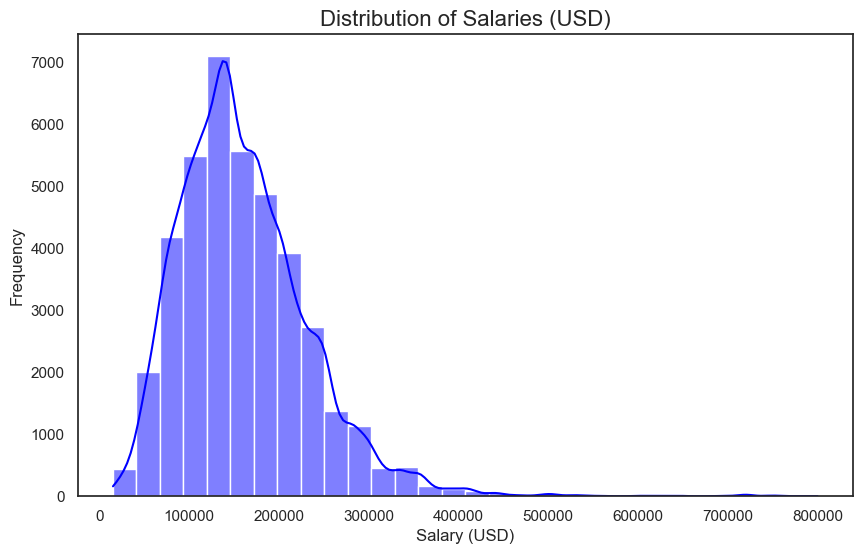


Summary Statistics (Mean, Median, Mode)
                        Mean    Median      Mode
salary         166767.108351  150000.0  150000.0
salary_in_usd  160758.519637  150000.0  150000.0
remote_ratio       22.570168       0.0       0.0


In [3]:
# Distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['salary_in_usd'], kde=True, bins=30, color='blue')
plt.title('Distribution of Salaries (USD)', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Calculating mean, median, and mode for numeric columns
numeric_columns = data_cleaned[['salary', 'salary_in_usd', 'remote_ratio']]
summary_statistics = numeric_columns.agg(['mean', 'median', lambda x: x.mode().iloc[0]])
summary_statistics.rename(index={'<lambda_0>': 'mode'}, inplace=True)
summary_statistics_df = summary_statistics.T
summary_statistics_df.columns = ['Mean', 'Median', 'Mode']
print("\nSummary Statistics (Mean, Median, Mode)")
print(summary_statistics_df)

Average salaries are quite high and above 150,000 annually, median and the most frequently paid is also $150,000. Approximately 22.57% of work is  remote.

In [4]:
# EDA Analysis and visualizations

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/2438589164.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='experience_level_full', y='salary_in_usd', palette='Set2', order=experience_order)


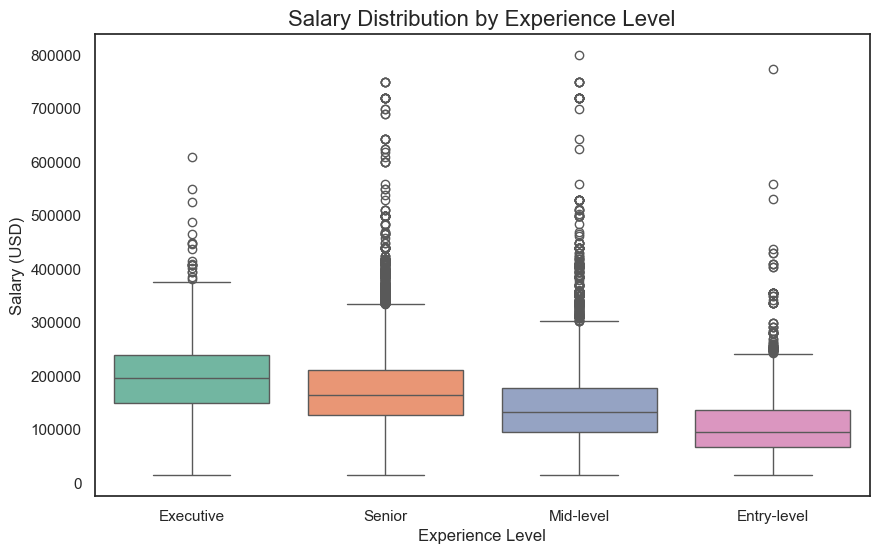

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/2438589164.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_cleaned, x='experience_level_full', y='salary_in_usd', palette='muted', order=experience_order, inner="quartile")


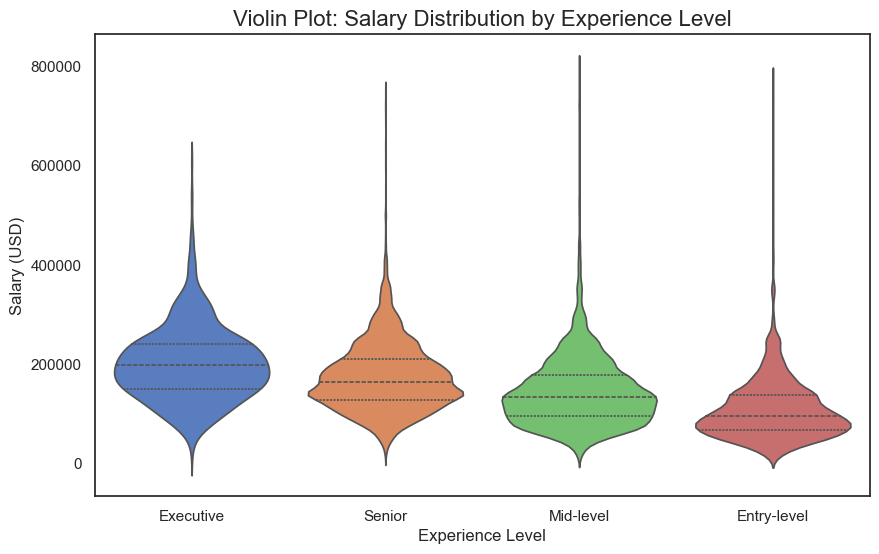

In [5]:
# Mapping of experience level abbreviations to full names
experience_mapping = {
    "SE": "Senior",
    "MI": "Mid-level",
    "EN": "Entry-level",
    "EX": "Executive"
}

data_cleaned['experience_level_full'] = data_cleaned['experience_level'].map(experience_mapping)

# Boxplot
experience_order = ["Executive", "Senior", "Mid-level", "Entry-level"]
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='experience_level_full', y='salary_in_usd', palette='Set2', order=experience_order)
plt.title('Salary Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()

# 13. Violin plot for salary distribution by experience level
plt.figure(figsize=(10, 6))
sns.violinplot(data=data_cleaned, x='experience_level_full', y='salary_in_usd', palette='muted', order=experience_order, inner="quartile")
plt.title('Violin Plot: Salary Distribution by Experience Level', fontsize=16)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()


Unsurprisingly, executives have the highest pay and entry level the lowest, with some mid-level talent having a high upper-end/upper-tail (Must be technical geniuses?)

These violin plots show pretty much the same information as the boxplots above. At least to the human eye.

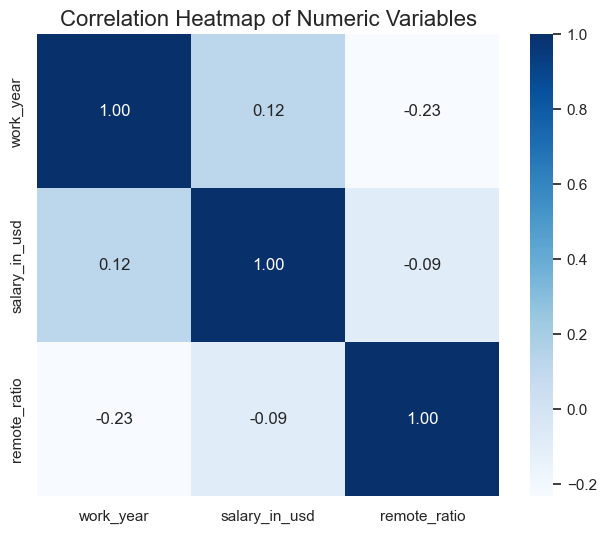

In [6]:
# Correlation heatmap for exhisting numeric variables
plt.figure(figsize=(8, 6))
numeric_data = data_cleaned[['work_year', 'salary_in_usd', 'remote_ratio']]
correlation = numeric_data.corr()

sns.heatmap(correlation, annot=True, cmap='Blues', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Numeric Variables', fontsize=16)
plt.show()


First a correlation heatmap of relevant numerical variables. There aren’t many and so we may have to convert categorical into numerical for our analyses. We do see salary is slightly positively correlated with year reflecting the salary increase year on year. We also see remote working slightly negatively correlated with salary, which also makes sense.

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/2467758490.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_jobs_counts.values, y=top_jobs_counts.index, palette='viridis')


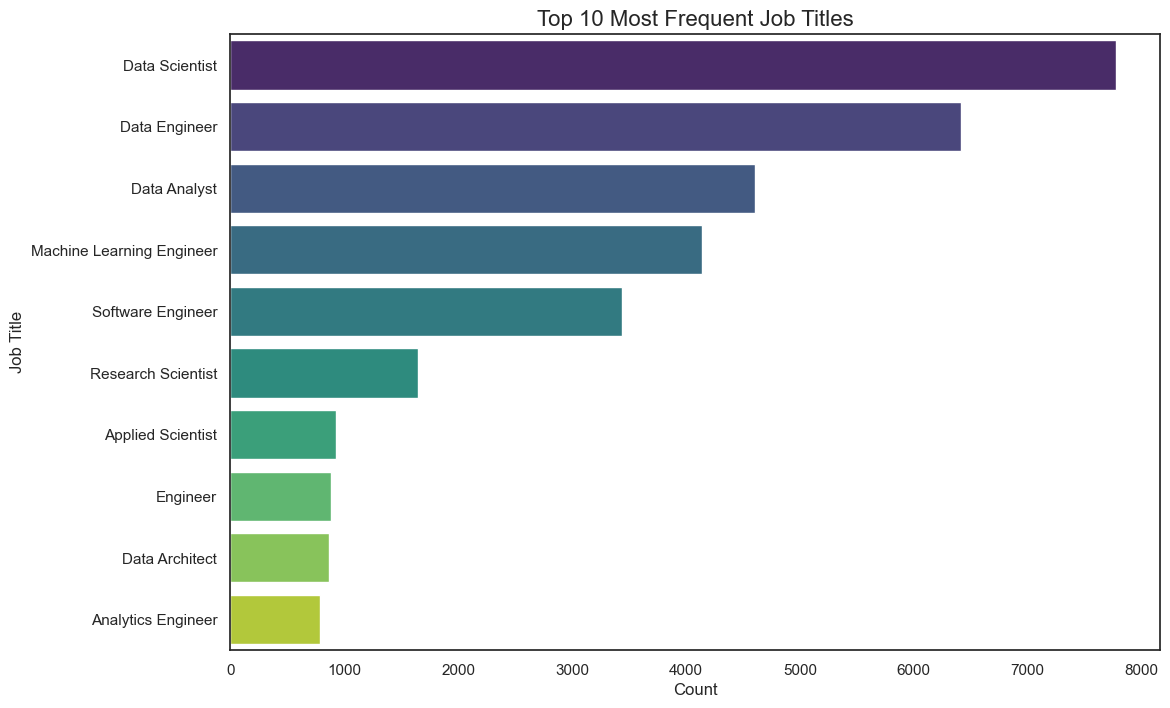

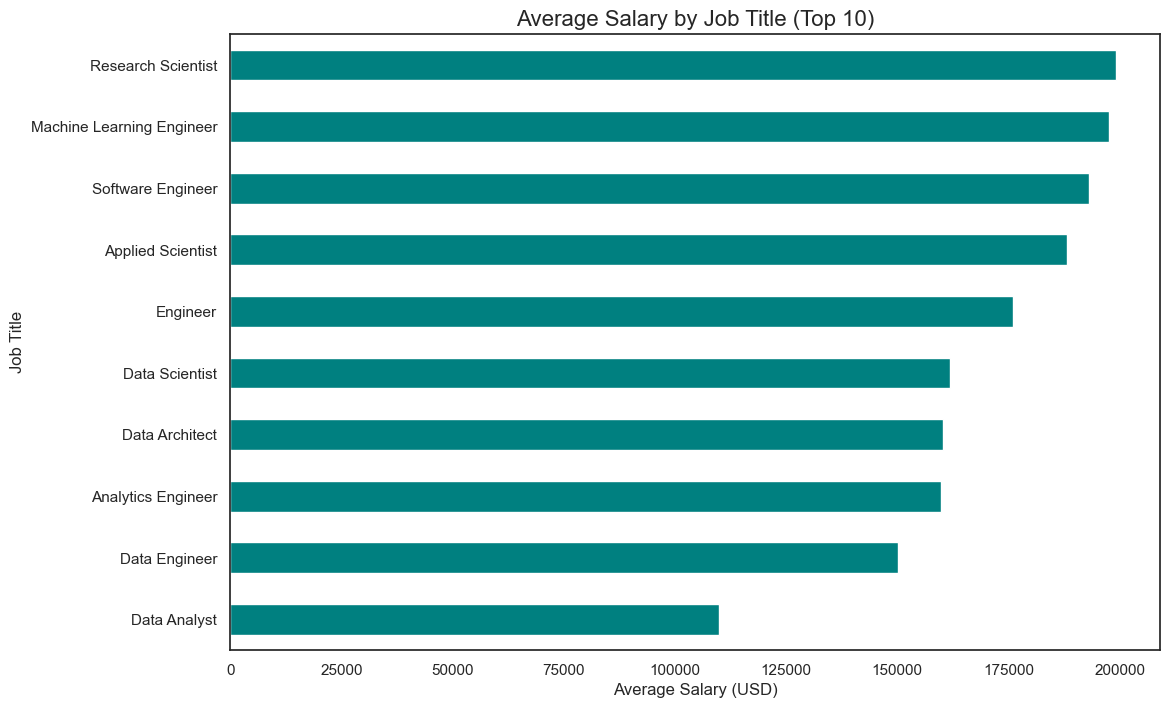

In [7]:
# Countplot for job titles (top 10 most frequent)
top_jobs_counts = data_cleaned['job_title'].value_counts().head(10)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_jobs_counts.values, y=top_jobs_counts.index, palette='viridis')
plt.title('Top 10 Most Frequent Job Titles', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()

# 3. Average salary by job title (top 10 job titles)
top_jobs = data_cleaned['job_title'].value_counts().head(10).index
avg_salary_by_job = data_cleaned[data_cleaned['job_title'].isin(top_jobs)].groupby('job_title')['salary_in_usd'].mean()

plt.figure(figsize=(12, 8))
avg_salary_by_job.sort_values().plot(kind='barh', color='teal')
plt.title('Average Salary by Job Title (Top 10)', fontsize=16)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()


The mid-level Data Scientist, Data Engineer, and entry-level Data Analysts are the most represented. No surprises here.

Research and Machine Learning earns the most, no surprises here either.

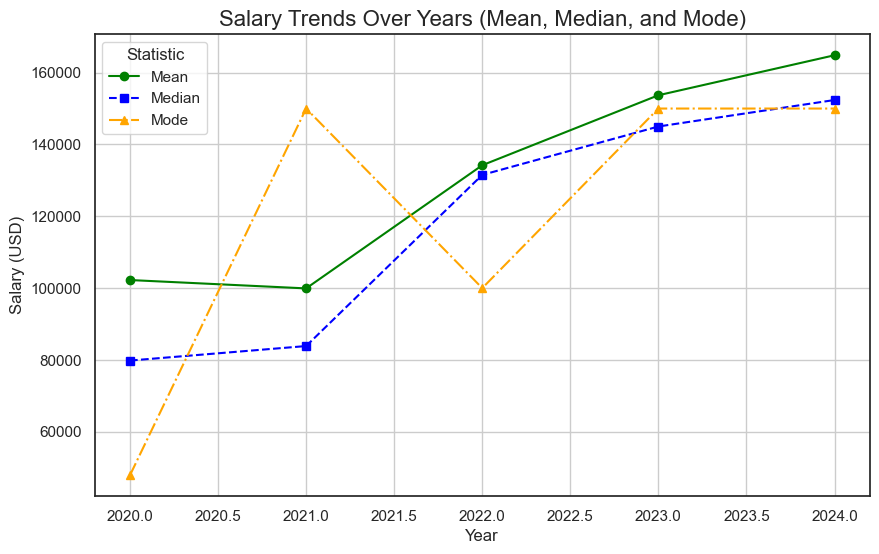

In [8]:
# Calculate mean, median, and mode salary for each year
salary_stats = data_cleaned.groupby('work_year')['salary_in_usd'].agg(['mean', 'median', lambda x: x.mode().iloc[0]])
salary_stats.rename(columns={'<lambda_0>': 'mode'}, inplace=True)

# Plot mean, median, and mode
plt.figure(figsize=(10, 6))
plt.plot(salary_stats.index, salary_stats['mean'], label='Mean', color='green', marker='o')
plt.plot(salary_stats.index, salary_stats['median'], label='Median', color='blue', linestyle='--', marker='s')
plt.plot(salary_stats.index, salary_stats['mode'], label='Mode', color='orange', linestyle='-.', marker='^')

# Add labels, title, and legend
plt.title('Salary Trends Over Years (Mean, Median, and Mode)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.legend(title='Statistic')
plt.grid(True)
plt.show()


We see just how much salaries have increased over the past 4 years. I will likely not apply time series analysis here since there is only 5 years of data though. There is not enough granularity to assess auto correlations and no seasonality to be observed.

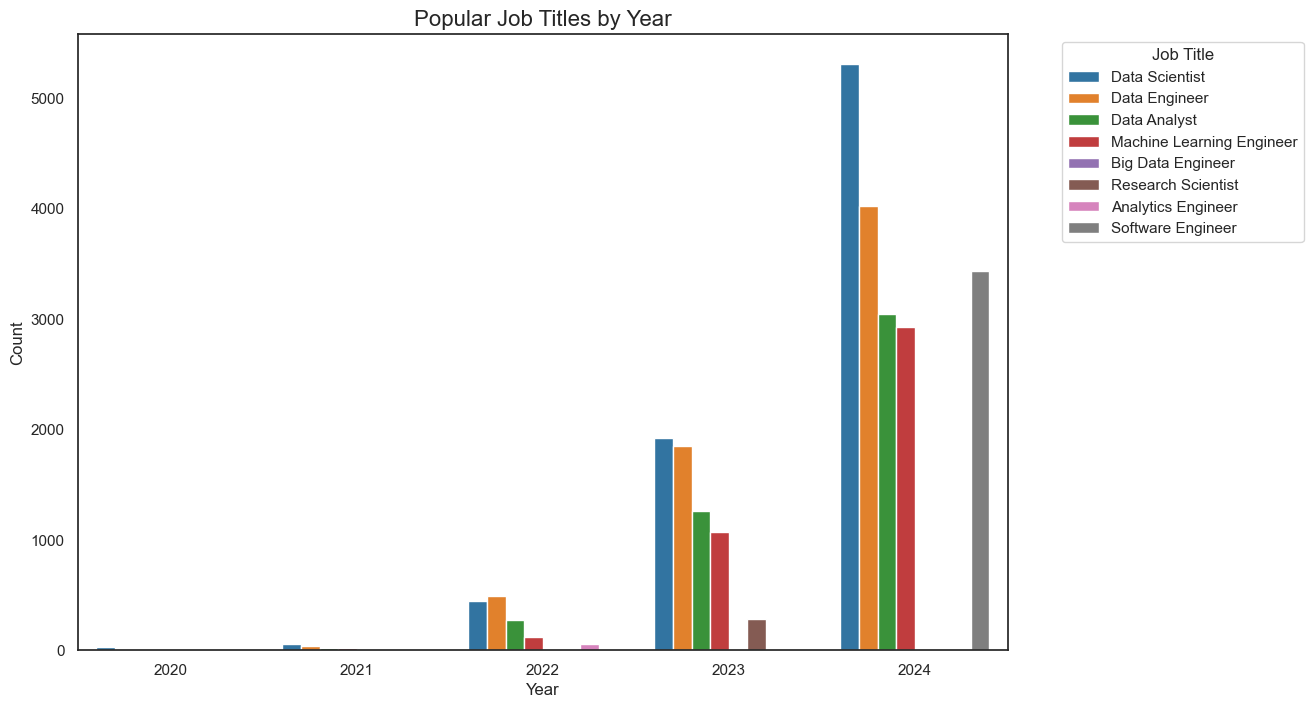

In [9]:
# Popular job titles by year
popular_jobs_year = data_cleaned.groupby(['work_year', 'job_title']).size().reset_index(name='count')
top_jobs_year = popular_jobs_year.sort_values(by='count', ascending=False).groupby('work_year').head(5)

plt.figure(figsize=(12, 8))
sns.barplot(data=top_jobs_year, x='work_year', y='count', hue='job_title', palette='tab10')
plt.title('Popular Job Titles by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Job Title', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Jobs are increasing quickly year on year, with “Data Scientist” title increasing the most and having the most count in 2024. What a great year to be taking data science courses!

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/1490051192.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_percentages.values, palette='coolwarm')


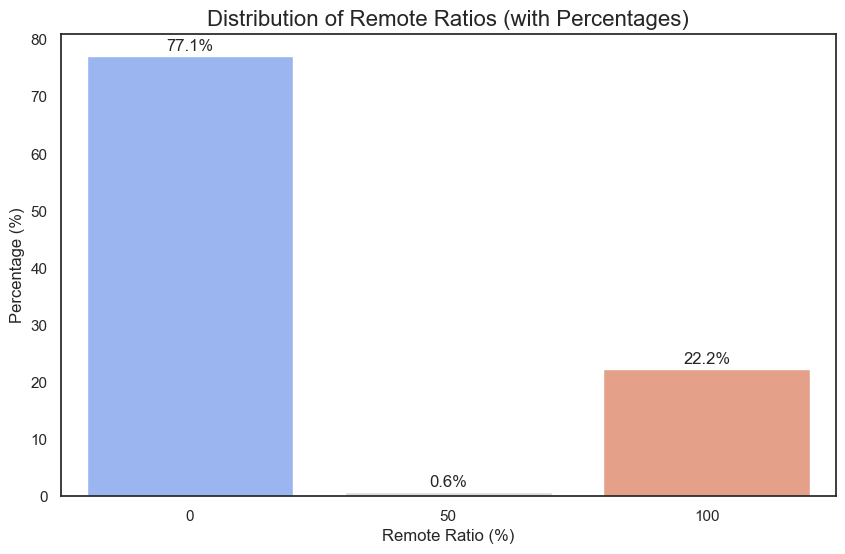

In [10]:
# Calculate the remote ratio counts and percentages
remote_ratio_counts = data_cleaned['remote_ratio'].value_counts()  
remote_ratio_percentages = (remote_ratio_counts / remote_ratio_counts.sum()) * 100  

# Sort the counts and percentages (I had an issue with display order)
remote_ratio_counts = remote_ratio_counts.sort_index()
remote_ratio_percentages = remote_ratio_percentages.sort_index()

# Bar chart with accurate labels and percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=remote_ratio_counts.index, y=remote_ratio_percentages.values, palette='coolwarm')
plt.title('Distribution of Remote Ratios (with Percentages)', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)

# Annotate the accurate percentages on the bars
for index, value in enumerate(remote_ratio_percentages.values):
    plt.text(index, value + 1, f'{value:.1f}%', ha='center', fontsize=12)

plt.show()

Only 0.6% work remote sometimes. For 77.1% it’s onsite and for 22.2% it’s fully remote working (These are official figures, reality is likely more mixed)

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/84726628.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='remote_ratio', y='salary_in_usd', palette='cool')


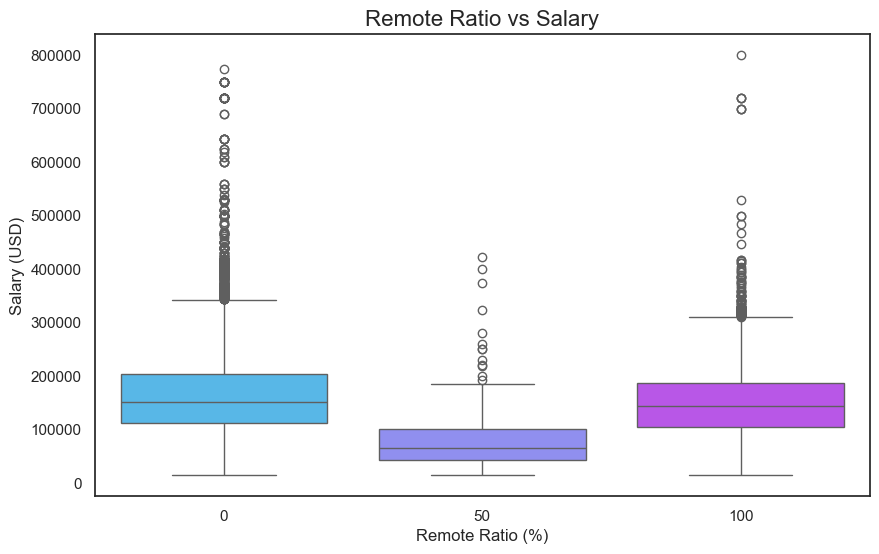

In [11]:
# Remote ratio vs. salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='remote_ratio', y='salary_in_usd', palette='cool')
plt.title('Remote Ratio vs Salary', fontsize=16)
plt.xlabel('Remote Ratio (%)', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()

Those working remote are paid slightly less according to the boxplot above. Sometimes remote workers receive the least pay (skewed ratio of maintenance workers perhaps?)

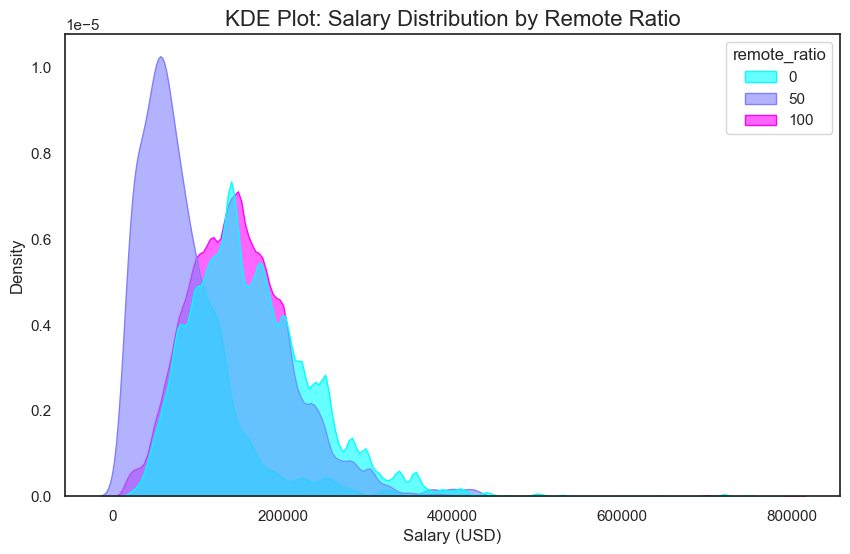

In [12]:
# KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=data_cleaned,
    x='salary_in_usd',
    hue='remote_ratio',
    fill=True,
    palette='cool',
    alpha=0.6,
    common_norm=False,  # Ensure densities are not normalized across categories
    bw_adjust=0.5  # Adjust bandwidth to make the curves more distinguishable
)
plt.title('KDE Plot: Salary Distribution by Remote Ratio', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

We see from KDE plot that there are less hybrids and it is distributed narrlowly in the lower end of salary spectrum, which fully onsite and fully remote are similarly distributed, with fully onsite (100%) having a slightly wider distribution.

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/2687224078.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='company_size', y='salary_in_usd', palette='pastel')


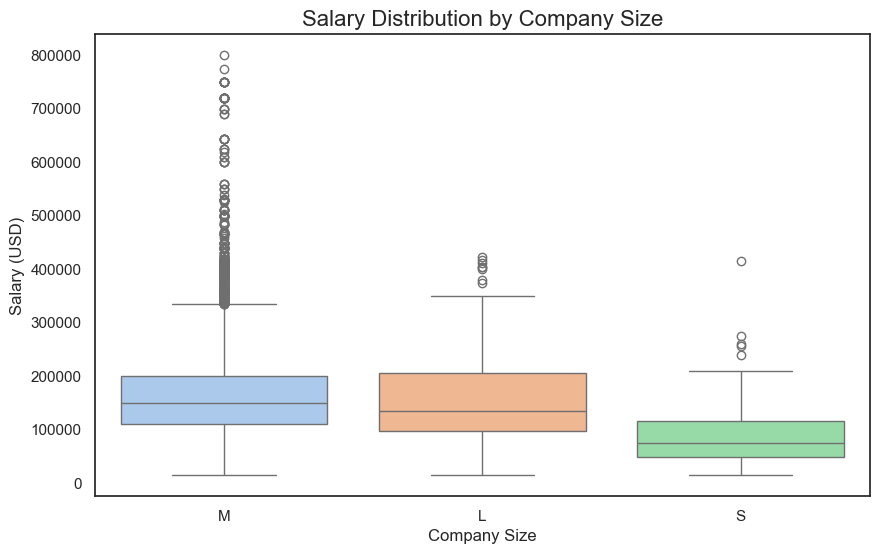

In [13]:
# Company size vs. salary
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='company_size', y='salary_in_usd', palette='pastel')
plt.title('Salary Distribution by Company Size', fontsize=16)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()


Surprisingly medium sized companies pay the best with a high salary tail as well. This might be due to 
1) Poaching the talent from larger companies and 
2) Nature of AI/ML/Data Science commercial work results in better medium companies

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/4194472140.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_cleaned, x='employment_type_full', y='salary_in_usd', palette='muted')


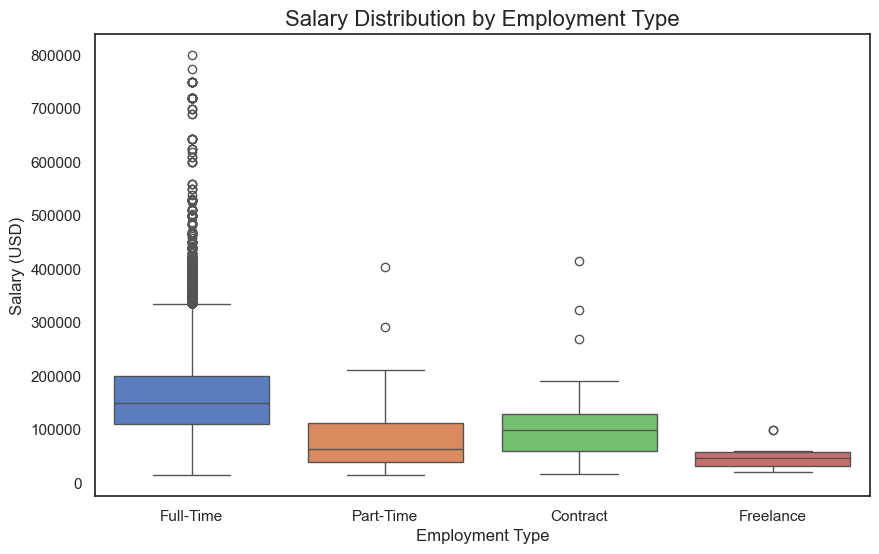

In [14]:
# Mapping for employment type abbreviations
employment_mapping = {
    "FT": "Full-Time",
    "PT": "Part-Time",
    "CT": "Contract",
    "FL": "Freelance"
}

# Replace the abbreviations with full names
data_cleaned['employment_type_full'] = data_cleaned['employment_type'].map(employment_mapping)

# Salary distribution by employment type with full labels
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='employment_type_full', y='salary_in_usd', palette='muted')
plt.title('Salary Distribution by Employment Type', fontsize=16)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.show()


Contract makes slightly more than part time on average, with freelance earning the lowest amount.

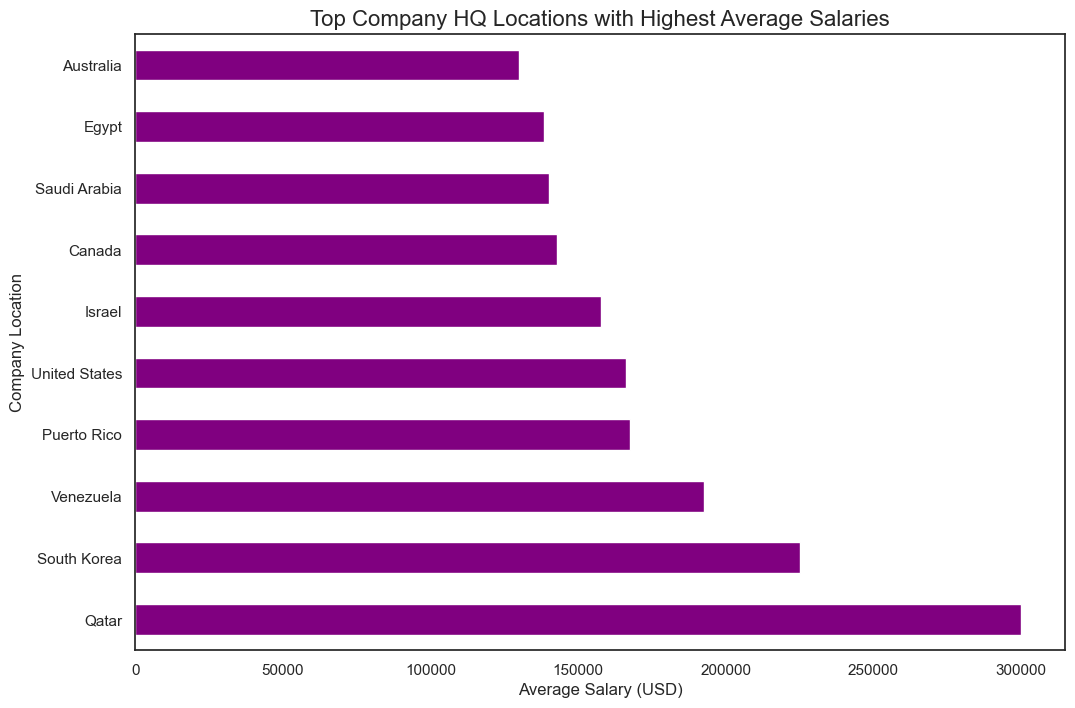

/var/folders/2x/j2yg_98j10n2xd364kzb8nvm0000gn/T/ipykernel_56457/3157728598.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


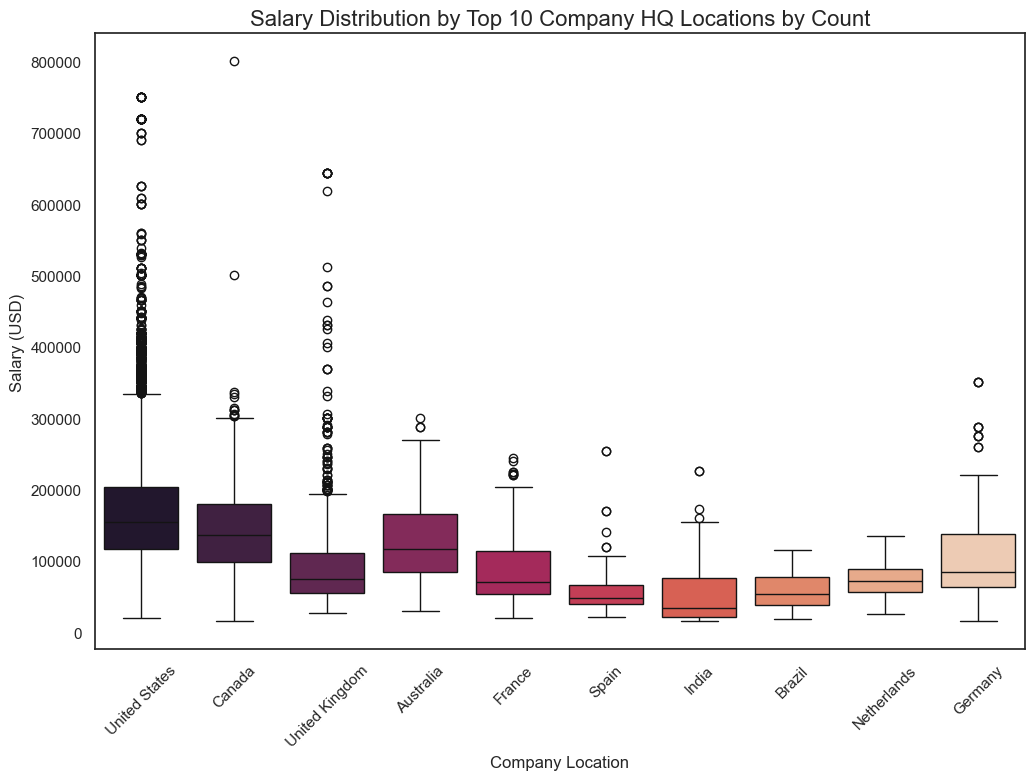

In [15]:
# Top locations with the highest salaries
top_locations = data_cleaned.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Mapping for country codes to full names
country_mapping = {
    "EG": "Egypt",
    "AU": "Australia",
    "SA": "Saudi Arabia",
    "CA": "Canada",
    "IL": "Israel",
    "US": "United States",
    "PR": "Puerto Rico",
    "VE": "Venezuela",
    "SK": "South Korea",
    "QA": "Qatar"
}

# Replace the country codes with full names
top_locations_full = top_locations.rename(index=country_mapping)

# Plot the top locations with full names
plt.figure(figsize=(12, 8))
top_locations_full.plot(kind='barh', color='purple')
plt.title('Top Company HQ Locations with Highest Average Salaries', fontsize=16)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Company Location', fontsize=12)
plt.show()

# Mapping for company location abbreviations to full names
location_mapping = {
    "US": "United States",
    "CA": "Canada",
    "GB": "United Kingdom",
    "AU": "Australia",
    "FR": "France",
    "ES": "Spain",
    "IN": "India",
    "BR": "Brazil",
    "NL": "Netherlands",
    "DE": "Germany"
}

# Replace the abbreviations with full names in the dataset
data_cleaned['company_location_full'] = data_cleaned['company_location'].map(location_mapping)

# Top 10 locations by count
top_locations_by_count = data_cleaned['company_location_full'].value_counts().head(10).index

# Boxplot with full location names
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=data_cleaned[data_cleaned['company_location_full'].isin(top_locations_by_count)], 
    x='company_location_full', 
    y='salary_in_usd', 
    palette='rocket'
)
plt.title('Salary Distribution by Top 10 Company HQ Locations by Count', fontsize=16)
plt.xlabel('Company Location', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Qatar companies pay the most and the US comes in at No. 5 worldwide. Egypt pays surprisingly well.

We do have the most respondents from the US and Canada, with a good representation worldwide.

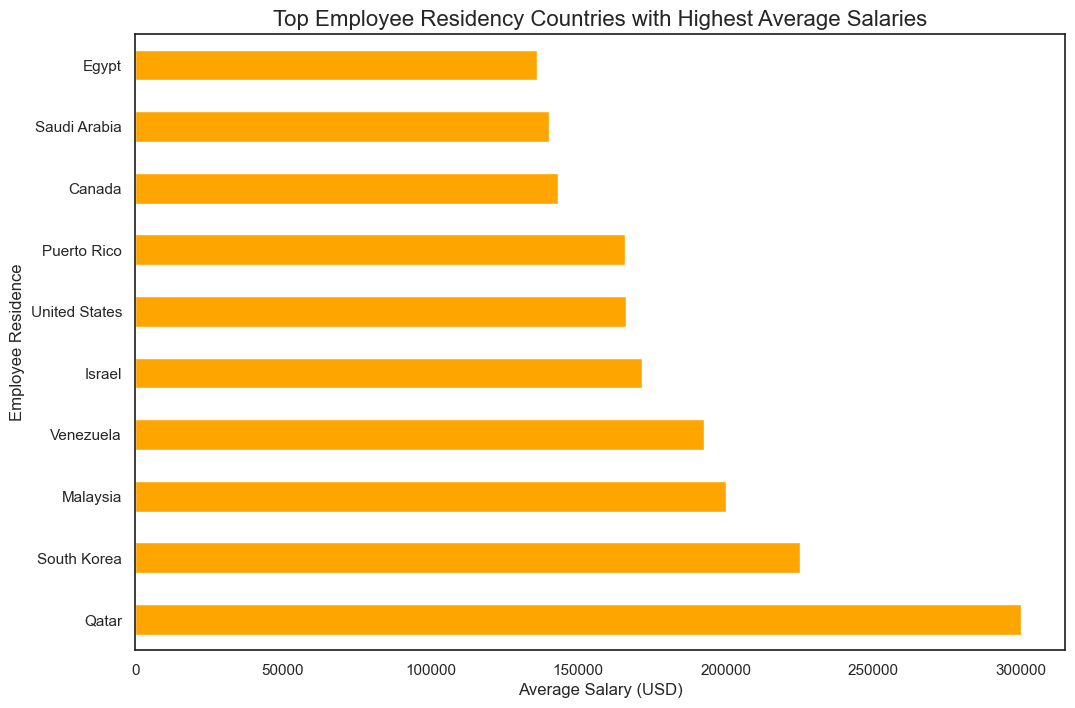

In [16]:
# Mapping of country codes to full country names
country_mapping = {
    "AU": "Australia",
    "SA": "Saudi Arabia",
    "CA": "Canada",
    "US": "United States",
    "PR": "Puerto Rico",
    "IL": "Israel",
    "VE": "Venezuela",
    "EG": "Egypt",
    "SK": "South Korea",
    "QA": "Qatar",
    "MY": "Malaysia"
}

top_residences = data_cleaned.groupby('employee_residence')['salary_in_usd'].mean().sort_values(ascending=False).head(10)

# Plot with full country names
top_residences_full_names = top_residences.rename(index=country_mapping)

plt.figure(figsize=(12, 8))
top_residences_full_names.plot(kind='barh', color='orange')
plt.title('Top Employee Residency Countries with Highest Average Salaries', fontsize=16)
plt.xlabel('Average Salary (USD)', fontsize=12)
plt.ylabel('Employee Residence', fontsize=12)
plt.show()



The above is almost an exact overlap with Top Company HQ Countries, the only new country is Malaysia (And Australia is not present), so Malaysia based workers earn a lot (likely working for non-malaysian companies).

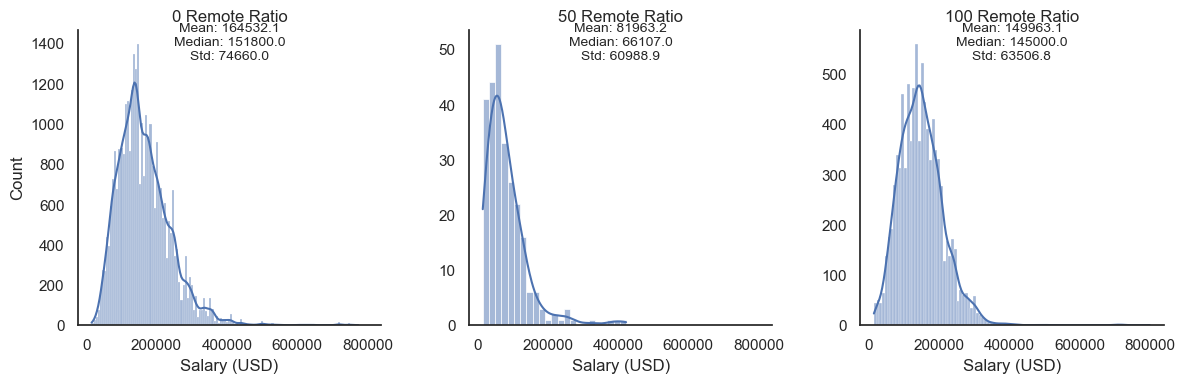

In [17]:
# Compute cognostics (mean salary per remote ratio)
cognostics = data_cleaned.groupby('remote_ratio')['salary_in_usd'].agg(['mean', 'median', 'std'])

# Annotate facet plots with cognostics
g = sns.FacetGrid(data_cleaned, col='remote_ratio', col_wrap=3, height=4, sharey=False)
g.map(sns.histplot, 'salary_in_usd', kde=True)

# Add annotations for cognostics
for ax, (remote_ratio, stats) in zip(g.axes.flat, cognostics.iterrows()):
    ax.text(0.5, 0.9, f"Mean: {stats['mean']:.1f}\nMedian: {stats['median']:.1f}\nStd: {stats['std']:.1f}", 
            fontsize=10, ha='center', transform=ax.transAxes)

g.set_titles("{col_name} Remote Ratio")
g.set_axis_labels("Salary (USD)", "Count")
plt.show()


There are many ways to slice and dice the data, shown above are a simple facet plot by remote working ratio, with cognostics being mean, median and variances.

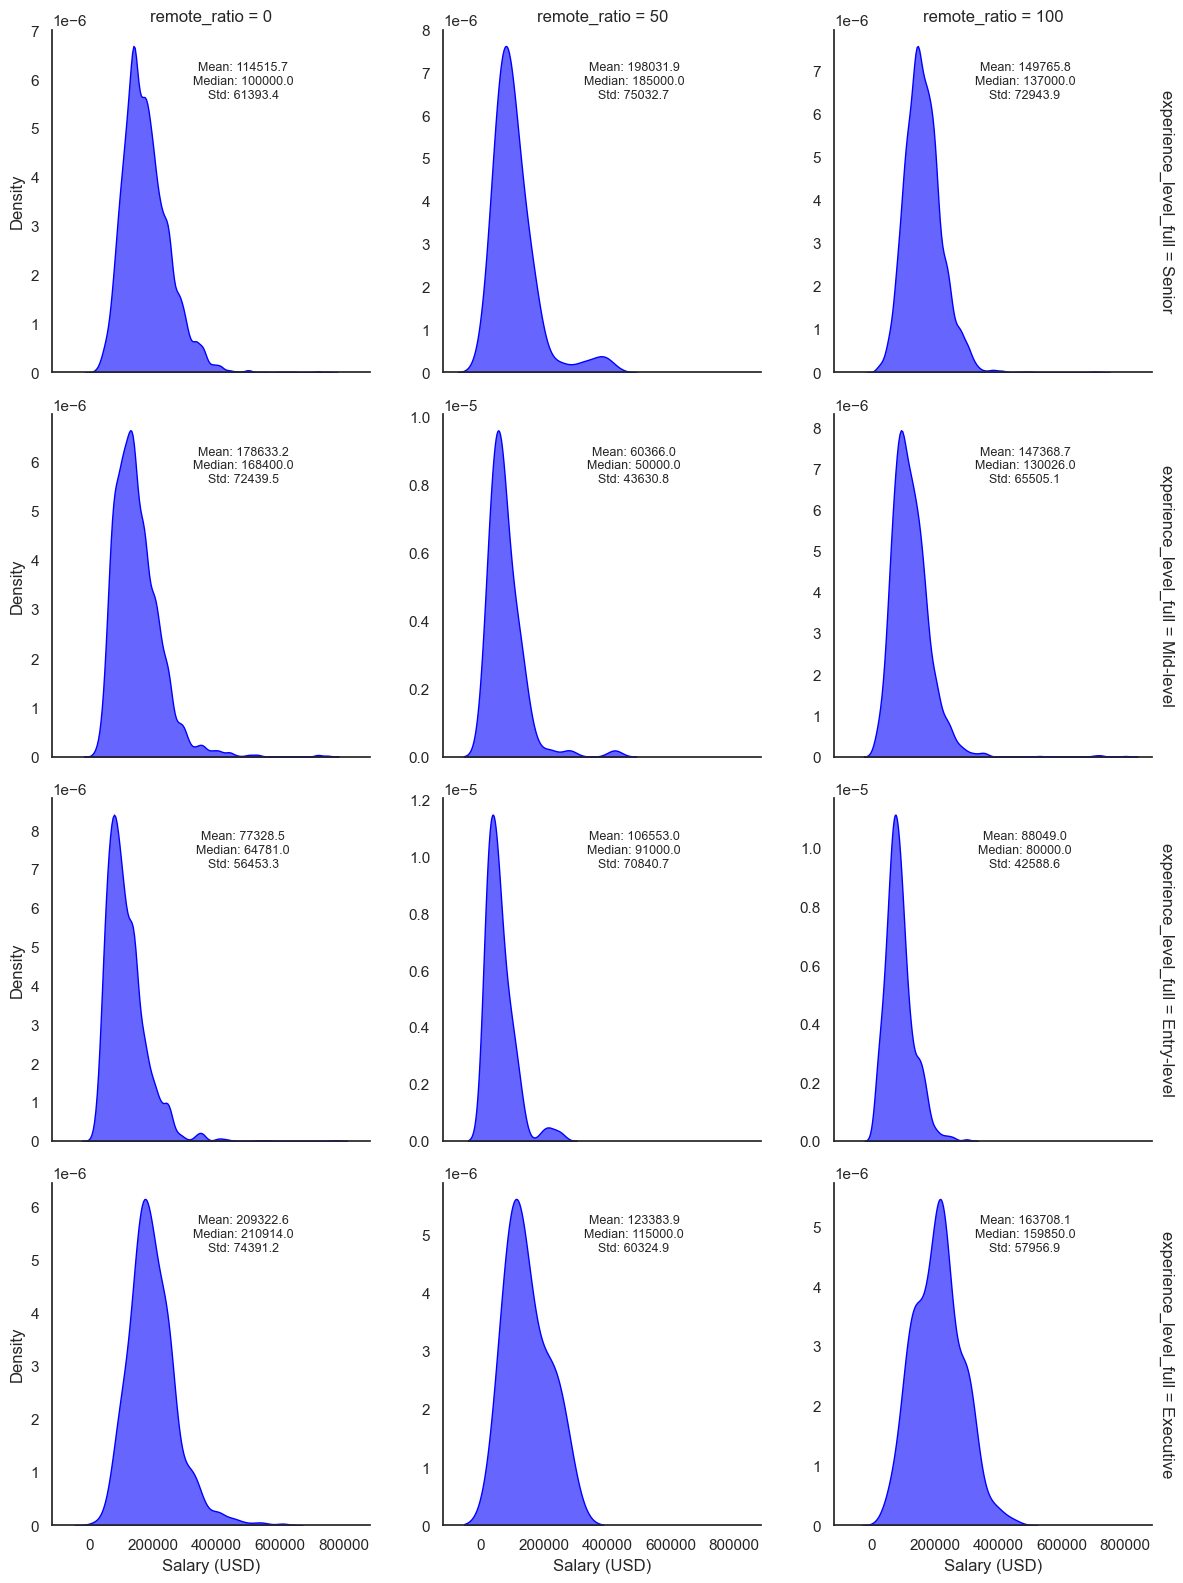

In [18]:
# Add a column with full experience for labels
data_cleaned['experience_level_full'] = data_cleaned['experience_level'].map(experience_mapping)

# Compute cognostics
cognostics = (
    data_cleaned.groupby(['remote_ratio', 'experience_level_full'])['salary_in_usd']
    .agg(['mean', 'median', 'std'])
    .reset_index()
)

# Create a FacetGrid for KDE plots
g = sns.FacetGrid(data_cleaned, col='remote_ratio', row='experience_level_full', margin_titles=True, height=4, sharey=False)
g.map(sns.kdeplot, 'salary_in_usd', fill=True, alpha=0.6, color='blue')

# Annotate each facet with cognostics
for ax, (_, row) in zip(g.axes.flat, cognostics.iterrows()):
    ax.text(0.6, 0.8, 
            f"Mean: {row['mean']:.1f}\nMedian: {row['median']:.1f}\nStd: {row['std']:.1f}", 
            transform=ax.transAxes, fontsize=9, ha='center', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

g.set_titles("Remote: {col_name}, Experience: {row_name}")
g.set_axis_labels("Salary (USD)", "Density")
plt.show()

|We could combine KDE showing salary levels by remote working and experience levels, showing mean, median and standard deviations for each.

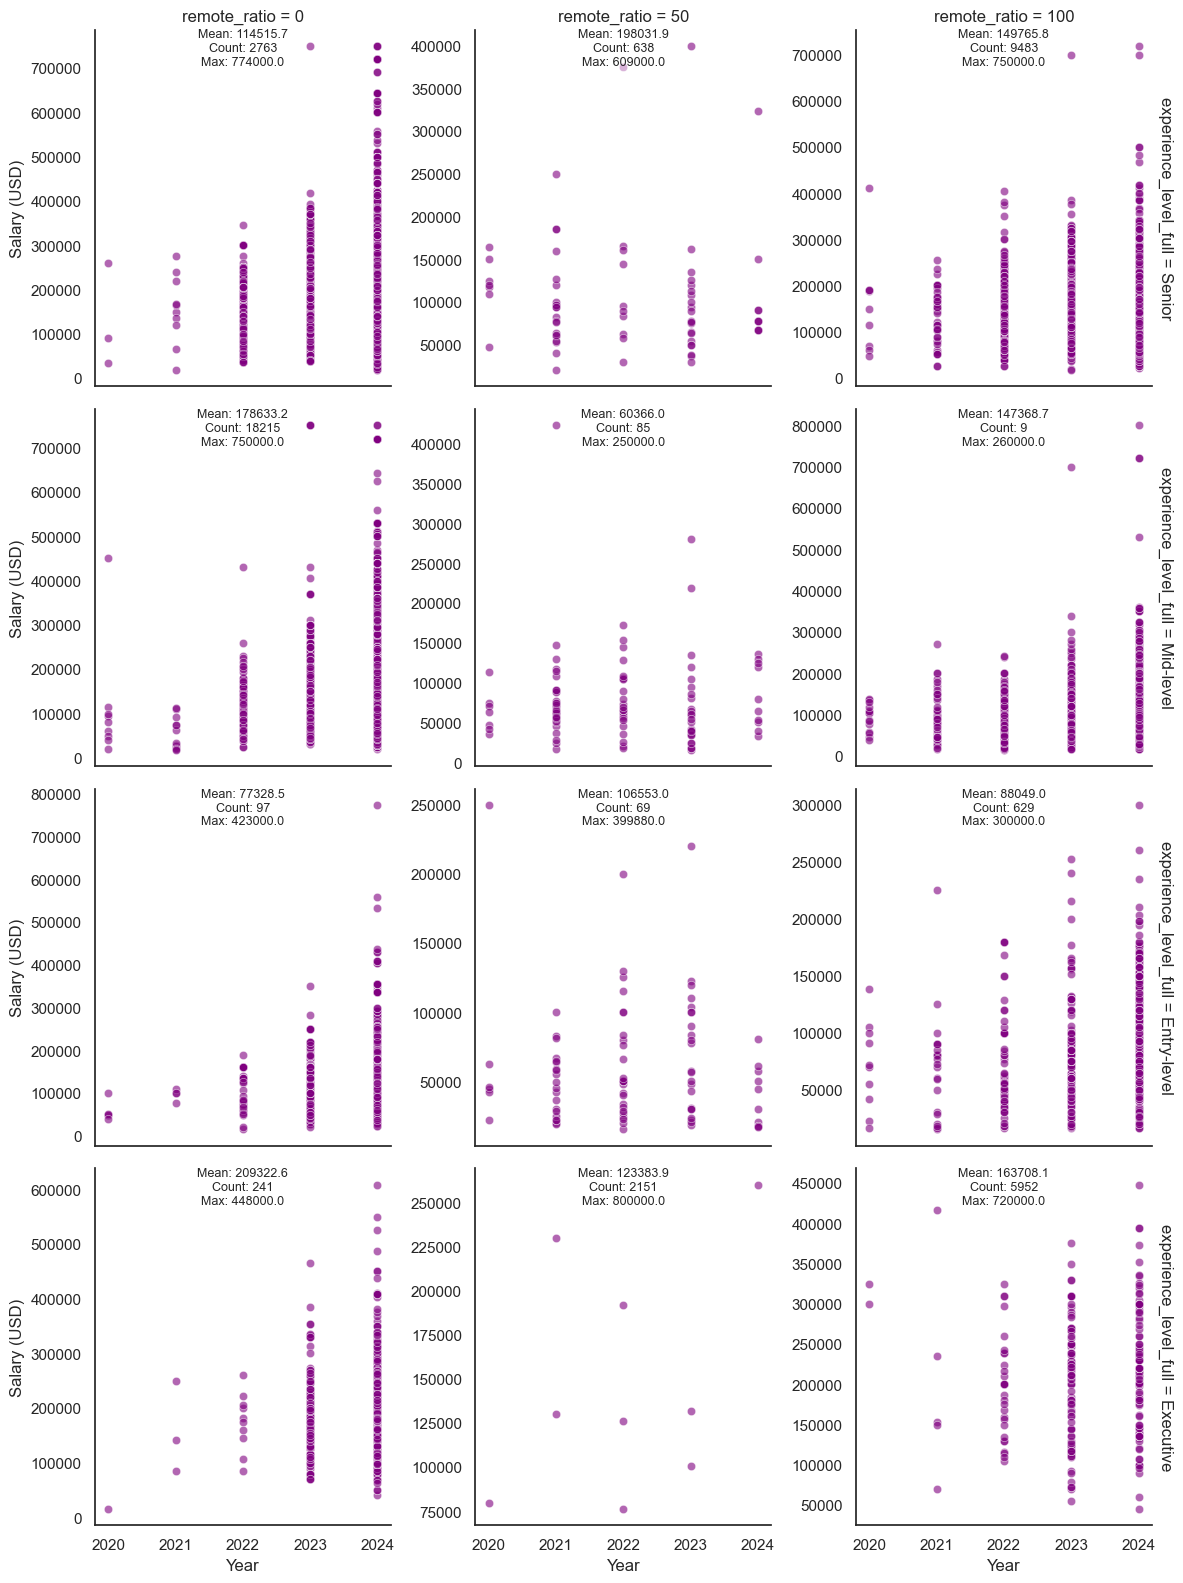

In [19]:
# Compute summary statistics for annotations
scatter_cognostics = (
    data_cleaned.groupby(['remote_ratio', 'experience_level_full'])['salary_in_usd']
    .agg(['mean', 'count', 'max'])
    .reset_index()
)

# Scatterplots of salaries over years for different remote ratios and experience levels
g = sns.FacetGrid(data_cleaned, col='remote_ratio', row='experience_level_full', margin_titles=True, height=4, sharey=False)
g.map(sns.scatterplot, 'work_year', 'salary_in_usd', alpha=0.6, color='purple')

# Cognostics
for ax, (_, row) in zip(g.axes.flat, scatter_cognostics.iterrows()):
    ax.text(0.5, 0.9, 
            f"Mean: {row['mean']:.1f}\nCount: {row['count']}\nMax: {row['max']:.1f}", 
            transform=ax.transAxes, fontsize=9, ha='center', bbox=dict(boxstyle="round", facecolor="white", alpha=0.5))

g.set_titles("Remote: {col_name}, Experience: {row_name}")
g.set_axis_labels("Year", "Salary (USD)")
plt.show()


We could also look at salary over each year, again gridded by remote working levels and experience levels, showing the mean, max, and counts similar to the above if the focus is purely EDA. However, we should get more inferences from the models themselves, which starts below

In [20]:
# Analysis Portion
# Note, classifier models (logistic regression) is skipped per suggestion for the proposal, since the
# Threshold I would apply is completely arbitrary.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import pymc as pm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import arviz as az

# Pre-Processing and Processing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Metrics
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Regularization
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

# Read data
file_path = 'global_ai_ml_data_salaries.csv'
df = pd.read_csv(file_path)

# List of categorical columns to include
categorical_cols = ['experience_level', 'employment_type', 'job_title', 'employee_residence', 'company_size',  'company_location']


In [22]:
# Combine rare categories in categorical cols into "Other"
def combine_rare_categories(column, threshold=0.01):
    value_counts = column.value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    print(len(rare_categories))
    return column.replace(rare_categories, 'Other')

df['job_title'] = combine_rare_categories(df['job_title'])

def combine_rare_categories(column, threshold=0.01):
    value_counts = column.value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    print(len(rare_categories))
    return column.replace(rare_categories, 'Other')

df['employee_residence'] = combine_rare_categories(df['employee_residence'])

def combine_rare_categories(column, threshold=0.01):
    value_counts = column.value_counts(normalize=True)
    rare_categories = value_counts[value_counts < threshold].index
    print(len(rare_categories))
    return column.replace(rare_categories, 'Other')

df['company_location'] = combine_rare_categories(df['company_location'])

# Drop Labels
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Exclude 'salary_currency' and 'salary' columns as we are using standardized "Salary_in_USD"
df_clean = df.drop(columns=['salary_currency', 'salary'])

214
88
79


In [23]:
# Clean column names to make them valid Python variable names
# Replace spaces with underscores and replace non-word characters with underscores
df_clean.columns = (
    df_clean.columns
    .str.replace(' ', '_', regex=False)
    .str.replace(r'\W', '_', regex=True)  # Replace non-word characters with underscores
    .str.replace(r'__+', '_', regex=True)  # Replace multiple underscores with single underscore
    .str.strip('_')  # Remove leading/trailing underscores
)

bool_cols = df_clean.select_dtypes(include=['bool']).columns

# Convert boolean columns to integers for further python processing
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

# Verify the conversion
print("\nData Types After Conversion:")
print(df_clean.dtypes)


Data Types After Conversion:
work_year                                   int64
salary_in_usd                               int64
remote_ratio                                int64
experience_level_EX                         int64
experience_level_MI                         int64
experience_level_SE                         int64
employment_type_FL                          int64
employment_type_FT                          int64
employment_type_PT                          int64
job_title_Applied_Scientist                 int64
job_title_Business_Intelligence_Engineer    int64
job_title_Data_Analyst                      int64
job_title_Data_Architect                    int64
job_title_Data_Engineer                     int64
job_title_Data_Scientist                    int64
job_title_Engineer                          int64
job_title_Machine_Learning_Engineer         int64
job_title_Manager                           int64
job_title_Other                             int64
job_title_Research_E

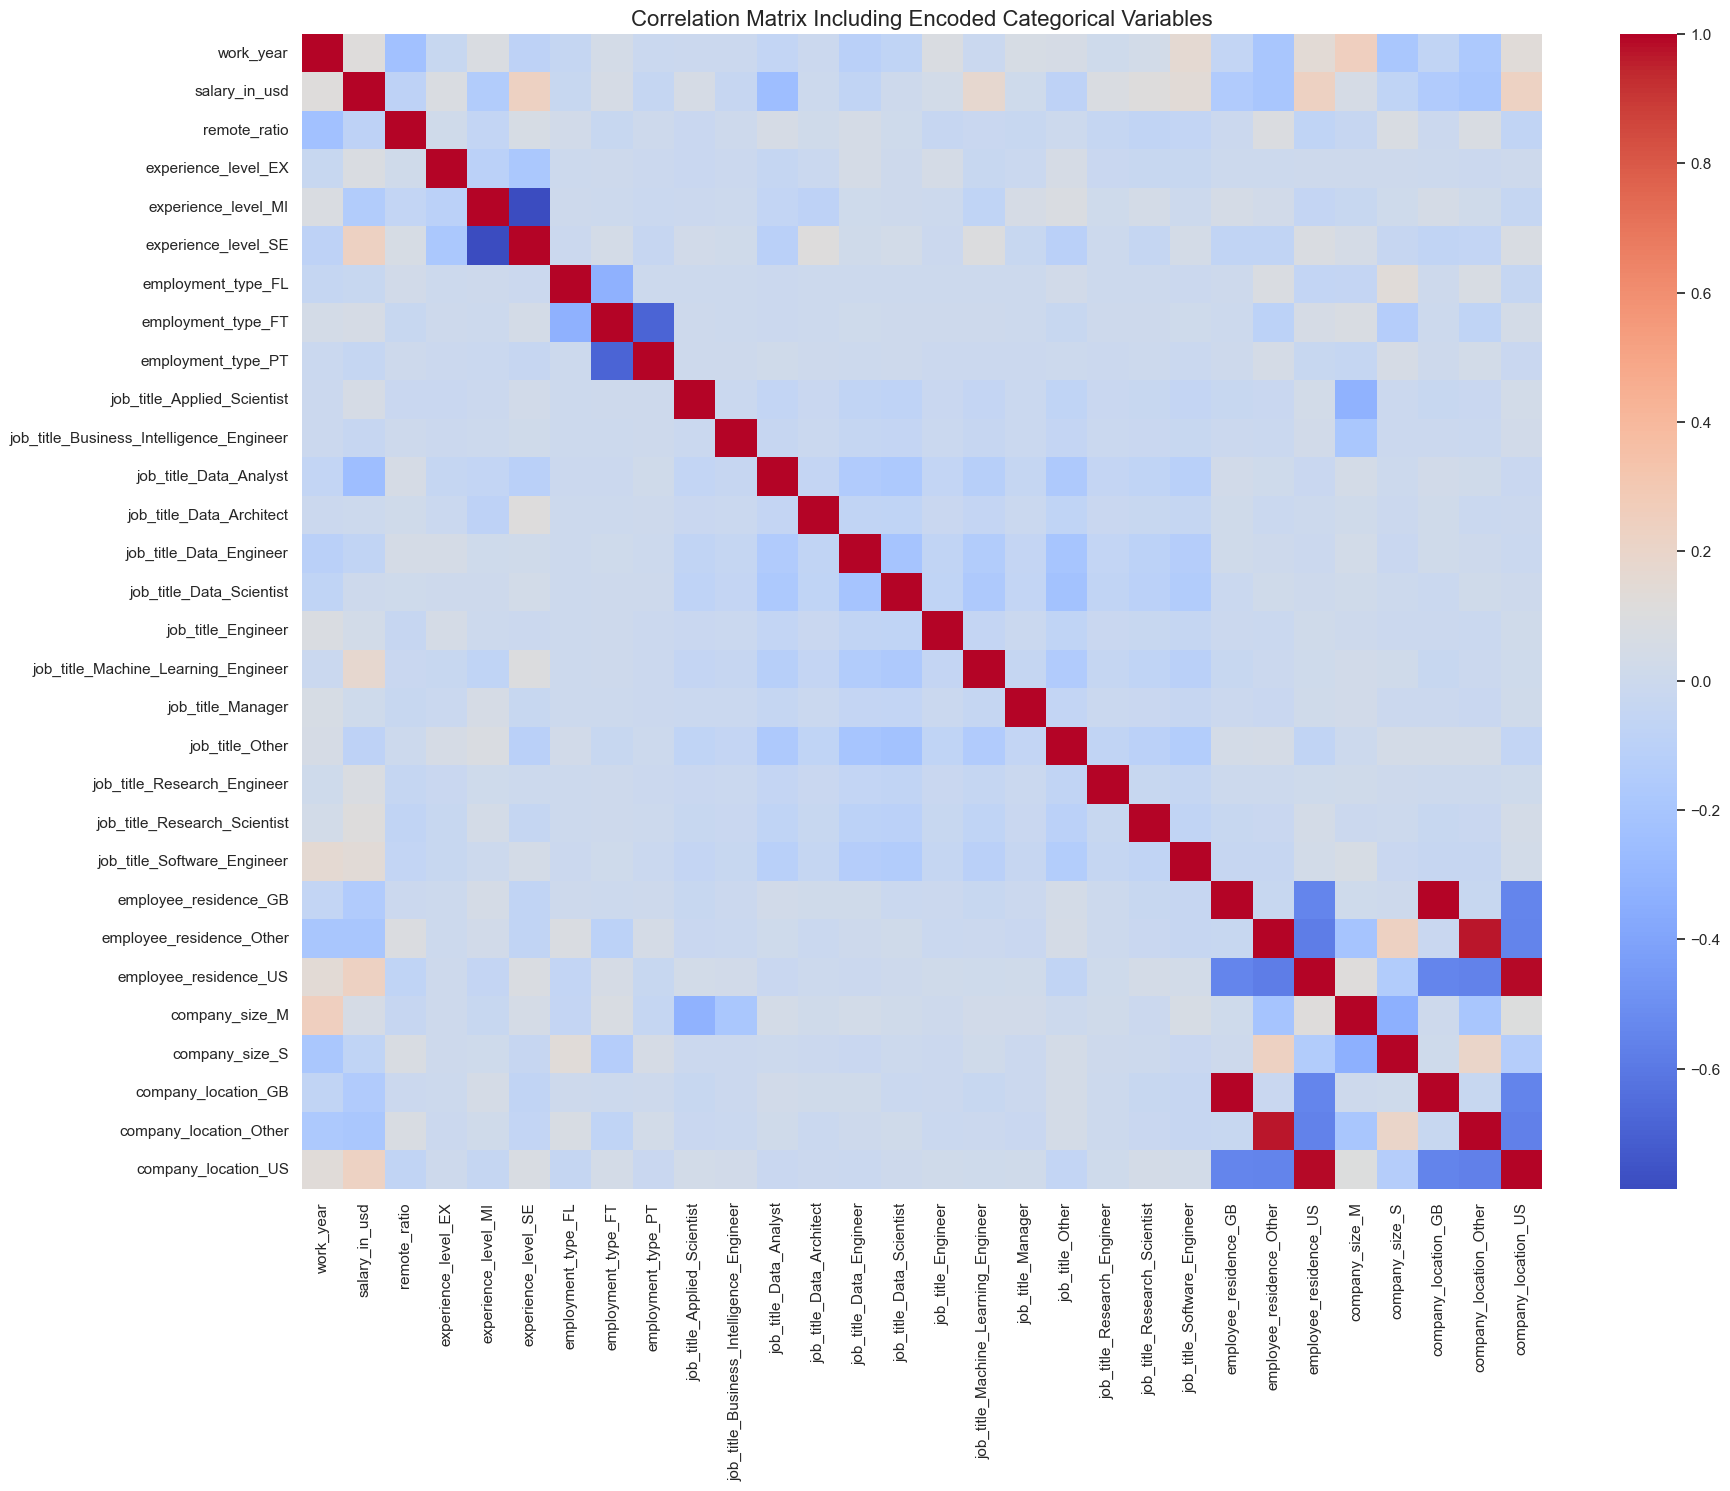

In [24]:
# Calculate the correlation matrix
correlation_matrix = df_clean.corr()

# Draw the heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=False, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Including Encoded Categorical Variables', fontsize=16)
plt.show()


Weak Overall Correlation with salary_in_usd:

The color intensity for salary_in_usd relative to other features is relatively pale, indicating weak correlations overall.
There are no strong red or blue cells in the salary_in_usd row/column, suggesting that no single predictor has a high positive or negative correlation.

Potentially Important Predictors:

Remote_ratio: Shows some weak positive correlation (light red tone).
Experience_level_EX and experience_level_SE: These experience level features show slight positive correlation.
Job Titles: Certain job titles (e.g., job_title_Machine_Learning_Engineer and job_title_Data_Scientist) seem to have slight correlations, but these are still weak.

Cross-Correlations:

The very strong cross- correlations are employee residence vs company locations (Most employees work in HQ), some mildly strong correlations between company size and residence. We also see certain job titles correlate with company size (Applied Scientist to Medium company size), which are all normal and expected.

Top 15 Correlations with salary_in_usd:
job_title_Data_Analyst                 0.251298
experience_level_SE                    0.236132
employee_residence_US                  0.234335
company_location_US                    0.230997
employee_residence_Other               0.195894
company_location_Other                 0.190618
job_title_Machine_Learning_Engineer    0.171877
company_location_GB                    0.152575
employee_residence_GB                  0.151588
experience_level_MI                    0.144584
job_title_Software_Engineer            0.135676
work_year                              0.117756
job_title_Research_Scientist           0.108888
remote_ratio                           0.087701
job_title_Other                        0.087461
Name: salary_in_usd, dtype: float64


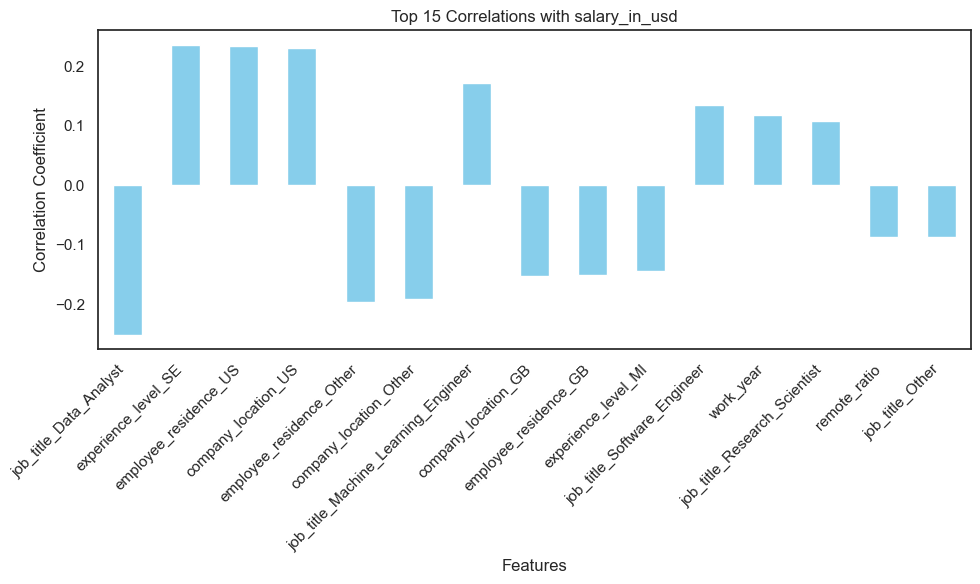

In [25]:
# Calculate correlations with response 'salary_in_usd'
correlations = df_clean.corr()['salary_in_usd'].drop('salary_in_usd')  # Drop self-correlation

# Sort correlations by absolute value and show top 15 correlations
sorted_correlations = correlations.abs().sort_values(ascending=False)
top_15_correlations = sorted_correlations.head(15)
print("Top 15 Correlations with salary_in_usd:")
print(top_15_correlations)

# Filter for visualization and plot top 15 correlations
top_15_features = top_15_correlations.index
correlation_values = correlations.loc[top_15_features]

plt.figure(figsize=(10, 6))
correlation_values.plot(kind='bar', color='skyblue')
plt.title('Top 15 Correlations with salary_in_usd')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


We see that in the top 15 correlations with the predictor no variable gets above 0.25, which we will see causes problems later on with a low R^2 result for our models.

In [26]:
# Define the variables and add constant
Y = df_clean['salary_in_usd']
X = df_clean.drop(columns=['salary_in_usd'])
X = sm.add_constant(X)

# Fit simple OLS model
ols_model = sm.OLS(Y, X).fit()
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.243
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:00:29   Log-Likelihood:            -5.0311e+05
No. Observations:               40332   AIC:                         1.006e+06
Df Residuals:                   40302   BIC:                         1.007e+06
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

In [27]:
# Extract significant predictors (p-value < 0.05) excluding the intercept
p_values = ols_model.pvalues
significant_predictors = p_values[p_values < 0.05].index.drop('const', errors='ignore')

# Create X_significant with only significant predictors and add intercept
X_significant = X[significant_predictors]
X_significant = sm.add_constant(X_significant)

# Fit the OLS model with significant predictors only
ols_model_significant = sm.OLS(Y, X_significant).fit()
print(ols_model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     586.2
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:00:29   Log-Likelihood:            -5.0406e+05
No. Observations:               40332   AIC:                         1.008e+06
Df Residuals:                   40313   BIC:                         1.008e+06
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

According to R^2, The model explains only 20.7% of the variation in salary_in_usd. This is quite low, suggesting that most of the variability in salary is not captured by the included predictors.

The F-stat of 586.2 shows the whole model is statistically significant.

Some job titles negatively impact salaries, while others positively influence them. This aligns with domain expectations.

All variables are statistically significant according to P values. I actually tried this project without grouping the variables into "Other", so it was a simple OLS (and log-transformed, other analysis performed as well) with over 400 predictors, and many were insignificant. The R^2 was similar and residual analysis was worse overall, thus I kept this version as the cleaner version with only around 20 predictors instead of 400 to start.

However, A very large condition number of 7.29e+06 suggests strong multicollinearity among the predictors. VIF will be done later.


We may also be missing important predictors as well: Factors such as education, company revenue, specific skills, or economic variables may explain more variation, but they are not part of the dataset.

In [28]:
# Num predictors for the initial model
num_predictors_initial = len(ols_model.params) - 1  # Subtract 1 for the intercept
print(f"Number of predictors in the initial model: {num_predictors_initial}")

# # Num predictors for the significant predictors only model 
num_predictors_significant = len(ols_model_significant.params) - 1  # Subtract 1 for the intercept
print(f"Number of predictors in the significant predictors model: {num_predictors_significant}")


Number of predictors in the initial model: 29
Number of predictors in the significant predictors model: 18


In [29]:
# Ensure intercept is handled correctly
# Drop constant column if it exists
if 'const' in X_significant.columns:
    X_significant = X_significant.drop(columns=['const'])

# Add a constant column explicitly (for intercept)
X_significant = sm.add_constant(X_significant, has_constant='add')


# Get the predictions from the significant-only model
Y_pred = ols_model_significant.predict(X_significant)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(Y, Y_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(Y, Y_pred)
print("MAE:", mae)


RMSE: 64786.91375947047
MAE: 48385.66287917833


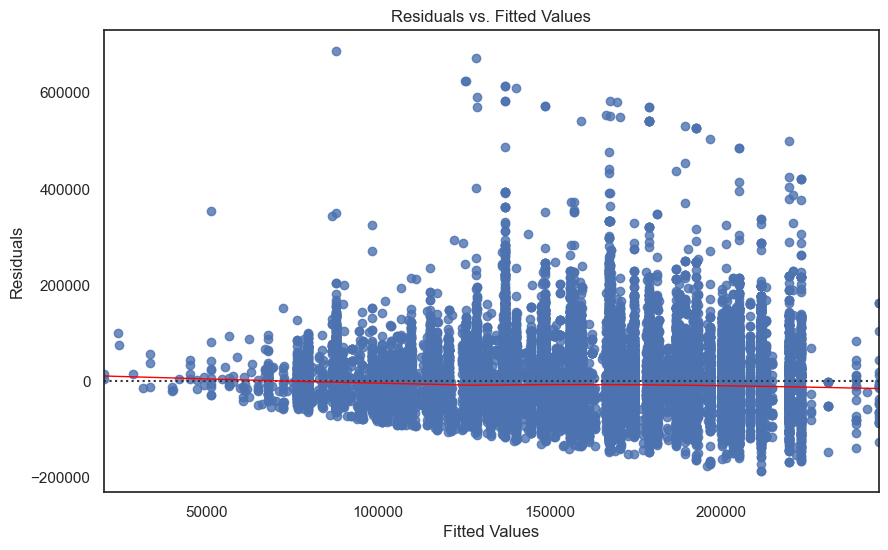

In [30]:
# Get fitted values and residuals
fitted_vals = ols_model_significant.fittedvalues
residuals = ols_model_significant.resid

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_vals, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


The residuals are scattered widely, indicating that the model frequently underestimates or overestimates the target variable, aligning with the low R^2. 

We see heteroscedasticity, the increasing spread of residuals as fitted values increase suggests that the variance of errors is not constant. The pattern also suggests the relationship between Y and Xs may not be strictly linear.


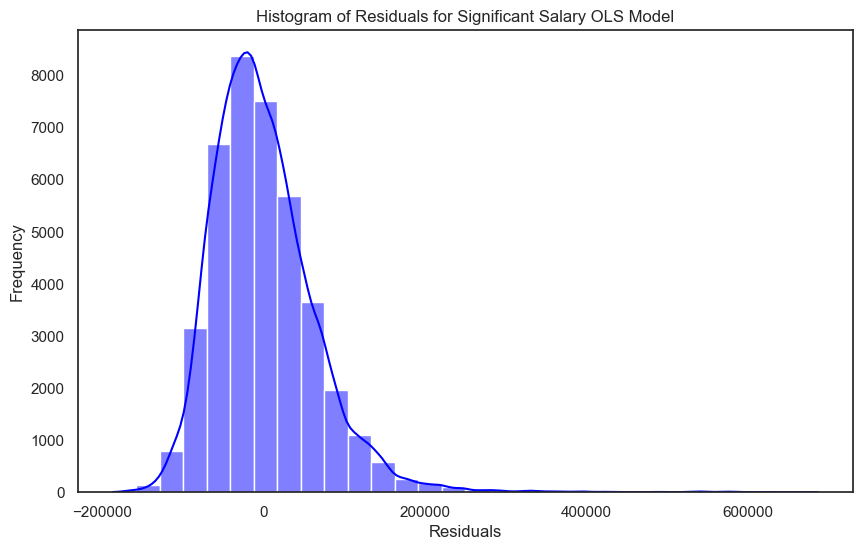

In [31]:
# Histogram of residuals for salary model
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals for Significant Salary OLS Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The residuals form a roughly bell-shaped distribution centered around zero. However, the histogram shows a slight positive skewness where residuals extend more towards the right (positive values). This indicates that the model systematically underestimates some large values in the response variable, which makes sense as they are a few outliers with very high salaries.

The low concentration seem corresponds to high variability in predictions, which can explain the relatively low R-squared observed earlier.

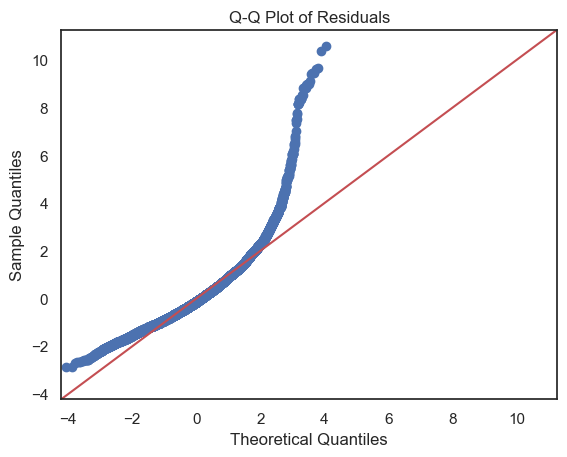

In [32]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


The residuals deviate significantly from the red 45-degree line, particularly in the right tail (positive residuals) and slightly in the left tail so the residuals do not follow a normal distribution. The residuals in the upper range are larger than expected under normality, reinforcing the observation of positive skewness seen in the histogram.

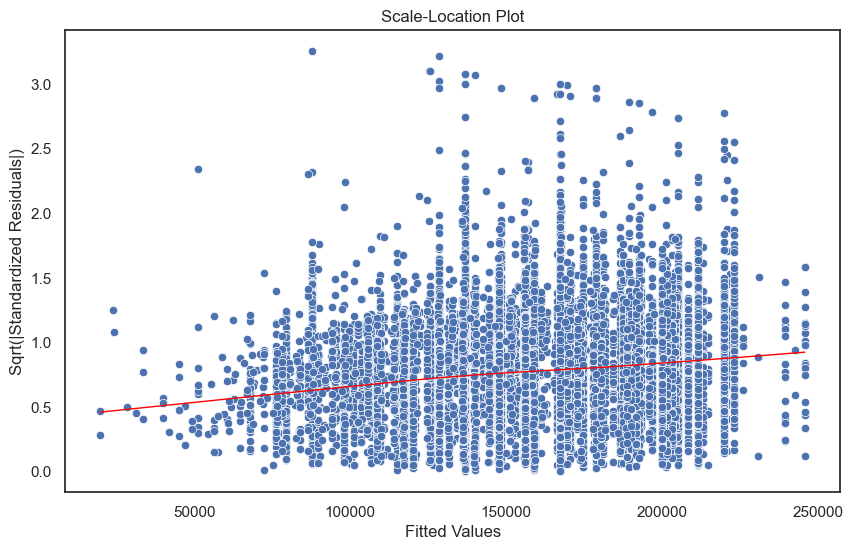

In [33]:
# Calculate standardized residuals
standardized_residuals = ols_model_significant.get_influence().resid_studentized_internal
sqrt_std_resid = np.sqrt(np.abs(standardized_residuals))

# Plot Scale-Location
plt.figure(figsize=(10, 6))
sns.scatterplot(x=fitted_vals, y=sqrt_std_resid)
sns.regplot(x=fitted_vals, y=sqrt_std_resid, scatter=False, ci=False, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Sqrt(|Standardized Residuals|)')
plt.title('Scale-Location Plot')
plt.show()


The spread of the residuals increases as the fitted values grow, indicating a potential heteroscedasticity issue. There is also a funnel shape. We should do a log transform given the above.

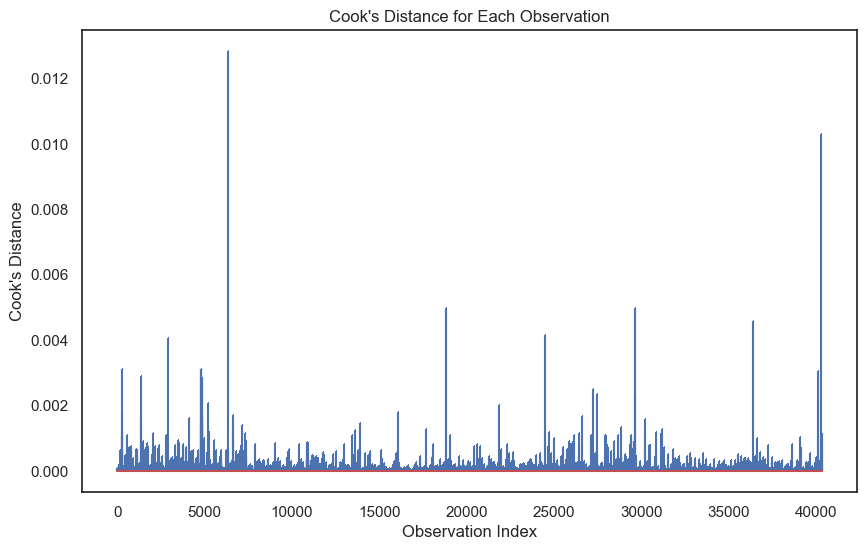

1906
0.04725776058712685


In [34]:
# Get influence measures
influence = ols_model_significant.get_influence()
cooks_d, p_values = influence.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.show()

# Identify observations with Cook's Distance > threshold
threshold = 4 / len(cooks_d)  # Common rule of thumb
influential_points = np.where(cooks_d > threshold)[0]

print(len(influential_points))

# Percentage of influential points of all points
print(len(influential_points)/len(df_clean['salary_in_usd']))



A few observations have spikes with relatively high Cook's Distance, but none of them appear excessively large and we only go up to 0.012. However there are 1906 of 4.7% of all points are influential.

In [35]:
# Log Transformed model

In [36]:
# Create log_salary_in_usd define it as target var
df_clean['log_salary_in_usd'] = np.log(df_clean['salary_in_usd'])
Y_log = df_clean['log_salary_in_usd']

# Define the predictor variables (exclude the target), add intercept
X = df_clean.drop(columns=['salary_in_usd', 'log_salary_in_usd'])
X = sm.add_constant(X)

# Fit the OLS model
log_ols_model = sm.OLS(Y_log, X).fit()
print(log_ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:      log_salary_in_usd   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     732.5
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:00:31   Log-Likelihood:                -18341.
No. Observations:               40332   AIC:                         3.674e+04
Df Residuals:                   40302   BIC:                         3.700e+04
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

R^2 of 0.345, while still relatively low, shows improvement compared to the untransformed model's R² of 0.207. The log transformation has improved the model's explanatory power. High F-stat shows model is still overall significant. 

We can interpret the coefficients to make inferences about the model, for example, for experience_level_EX: A coefficient of 0.5804 implies that salary_in_usd increases by approximately 58% for employees at the "EX"  (Executive) experience level compared to the baseline.


We have 9 predictors that are not significant at the 95% level and so we drop them below.

The condition number is still very high and we still have multicollinearity. 

The skew value (0.011) and kurtosis (3.858) suggest that residuals may not perfectly align with a normal distribution but are not extremely far off.



In [37]:
# Extract significant predictors based on p-values:
p_values_logm = log_ols_model.pvalues
significant_predictors_logm = p_values_logm[p_values_logm < 0.05].index.drop('const', errors='ignore')

# Create X_significant with only significant predictors and add constant
X_significant_logm = X[significant_predictors_logm]
X_significant_logm = sm.add_constant(X_significant_logm)

# Fit the OLS model with significant predictors
log_ols_model_significant = sm.OLS(Y_log, X_significant_logm).fit()
print(log_ols_model_significant.summary())


                            OLS Regression Results                            
Dep. Variable:      log_salary_in_usd   R-squared:                       0.345
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     1060.
Date:                Fri, 20 Dec 2024   Prob (F-statistic):               0.00
Time:                        12:00:31   Log-Likelihood:                -18355.
No. Observations:               40332   AIC:                         3.675e+04
Df Residuals:                   40311   BIC:                         3.693e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

The R^2 has not changed after dropping the insignificant variables, as they are insignificant.

Inferences and comments on the coeficients:

Work year: Slightly positive coefficient indicates later years increases salary slightly, which makes sense due to inflation.

Remote work: Remote ratio decreases pay and full-time increases pay, makes sense.

Experience level: We see MI actually have a larger positive coefficient than SE, which is odd as "senior" is higher level than "middle level".

Job Title: Specific titles increases salary and entry level titles such as "Data Analyst", "Data Engineer" and "Business_Intelligence_Engineer" decreases salary, which makes sense.

Location: US increases salary slightly and Great Britain or other employee residences reduce pay, makes sense.

Company size: Smaller companies pay less, which makes sense. We find that any larger size isn't significant as they likely have standard payscale systems in place that are market oriented.


So all the coefficient magnitudes and signs makes sense and are expected, except the experience level where we surprisingly find mid level making more than senior level (These are categorical, mutually exclusive and not marginal increases, to be clear).


In [38]:
# Ensure intercept is handled correctly
# Drop constant column if it exists
if 'const' in X_significant_logm.columns:
    X_significant_logm = X_significant_logm.drop(columns=['const'])

# Add a constant column explicitly (for intercept)
X_significant_logm = sm.add_constant(X_significant_logm, has_constant='add')


# Get the predictions from the significant-only model
Y_log_pred = log_ols_model_significant.predict(X_significant_logm)

# Calculate RMSE and MAE
rmse = np.sqrt(mean_squared_error(Y_log, Y_log_pred))
print("RMSE:", rmse)

mae = mean_absolute_error(Y_log, Y_log_pred)
print("MAE:", mae)


RMSE: 0.3814205766653582
MAE: 0.3002030714488603


A RMSE value of 0.3014 is relatively small, which suggests the residual errors are low when considering the log-transformation, similar for MAE which looks quite look, indicating consistent performance without extreme outliers' significant influence.

In [39]:
# For the initial model (ols_model_salary)
num_predictors_initial = len(log_ols_model.params) - 1  # Subtract 1 for the intercept
print(f"Number of predictors in the initial model: {num_predictors_initial}")

# For the significant predictors model (ols_model_significant)
num_predictors_significant = len(log_ols_model_significant.params) - 1  # Subtract 1 for the intercept
print(f"Number of predictors in the significant predictors model: {num_predictors_significant}")


Number of predictors in the initial model: 29
Number of predictors in the significant predictors model: 20


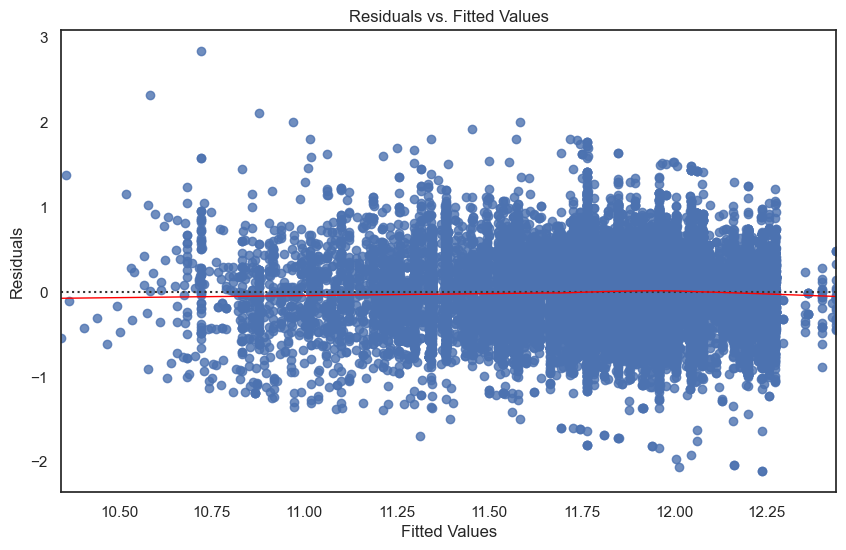

In [40]:
# Get fitted values and residuals
fitted_vals_logm = log_ols_model_significant.fittedvalues
residuals_logm = log_ols_model_significant.resid

# Plot Residuals vs. Fitted Values
plt.figure(figsize=(10, 6))
sns.residplot(x=fitted_vals_logm, y=residuals_logm, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.show()


The residuals appear randomly scattered around the zero line (horizontal red line), suggesting the model captures the mean trend without strong bias, which is much better compared to the simple OLS. This supports the assumption of linearity in the relationship. However, there still looks to be a slight full shape, evidence of non-constant variance, likely due to extreme salary outliers.

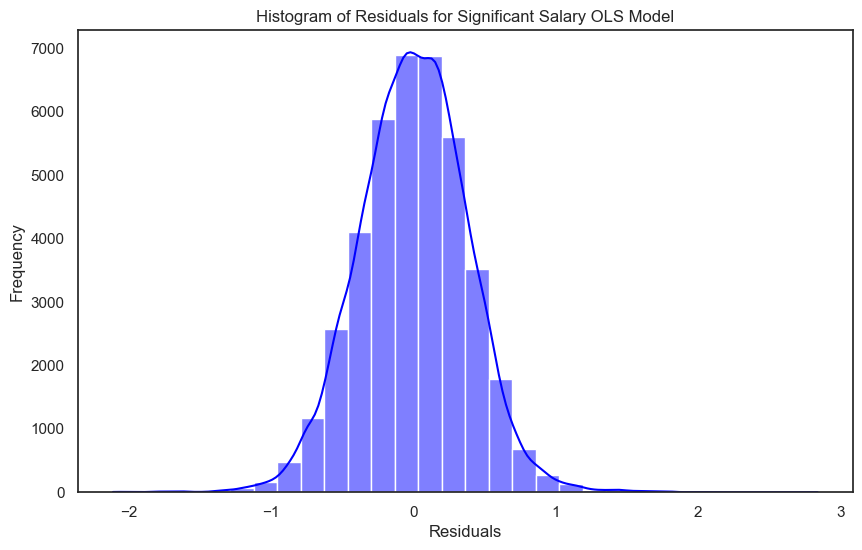

In [41]:
# Step 6: Histogram of residuals for salary model
plt.figure(figsize=(10, 6))
sns.histplot(residuals_logm, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals for Significant Salary OLS Model')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

The histogram now shows a bell-shaped curve, which is relatively symmetric and centered around zero, much better than that of the non-transformed simple OLS. We can however still see a slight right tail, as the few high outlier salaries still appear.


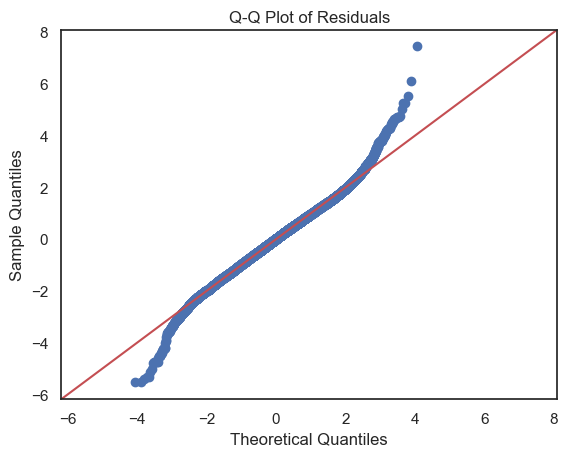

In [42]:
# Q-Q Plot
sm.qqplot(residuals_logm, line='45', fit=True)
plt.title('Q-Q Plot of Residuals')
plt.show()


Most of the points align well with the 45-degree red line in the middle of the plot, indicating residuals are approximately normally distributed for the majority of observations. However, the heavy tails on both ends are still very apparent, meaning the model struggles with tail predictions.

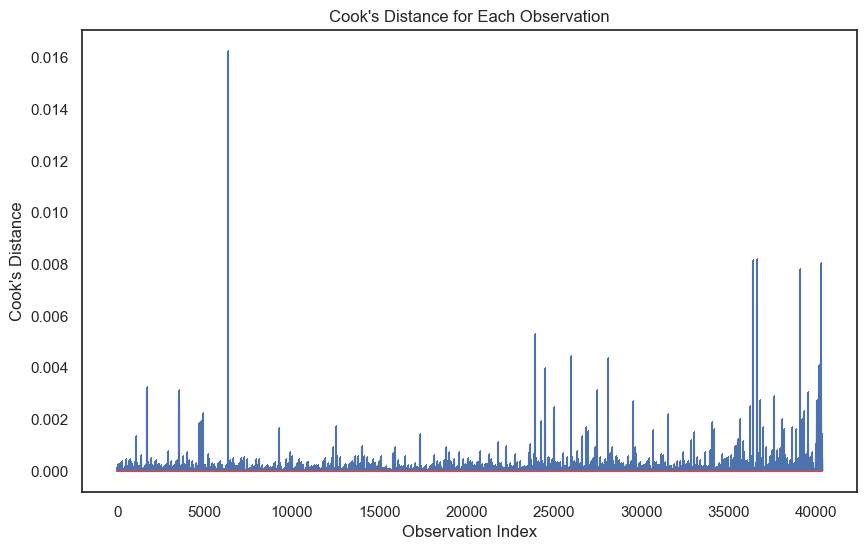

2198
0.05449766934444114


In [43]:
# Get influence measures
influence_logm = log_ols_model_significant.get_influence()
cooks_d_logm, p_values_logm = influence_logm.cooks_distance

# Plot Cook's Distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(cooks_d_logm)), cooks_d_logm, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance for Each Observation")
plt.show()

# Identify observations with Cook's Distance > threshold
threshold_logm = 4 / len(cooks_d_logm)  # Common rule of thumb
influential_points_logm = np.where(cooks_d_logm > threshold_logm)[0]
print(len(influential_points_logm))

# Percentage of influential points of all points
print(len(influential_points_logm)/len(df_clean['salary_in_usd']))


A small number of observations have high Cook's distance values compared to the majority of the data. The spikes around specific indices (e.g., around 5000, 20000, 35000) suggest outliers or high leverage points still. 

We use again the same 4/n number of observations as a commonly used threshold. There are now 2198 observations or 5.45% of all data above this threshold. So log transform actually slightly increased the number of points classified as outliers.

The DW statistics are all very close to 2, which suggest no autocorrelation in the residuals.

In [44]:
# Best Predictors Search

In [45]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
     X[significant_predictors_logm],Y_log, test_size=0.2, random_state=42
)


# Initialize scaler
scaler = StandardScaler()

# Fit the scaler on the training data only
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

# Convert scaled data back to DataFrame for convenience
X_train_scaled = pd.DataFrame(X_train_scaled, columns=significant_predictors_logm, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=significant_predictors_logm, index=X_test.index)

X_train_sm = sm.add_constant(X_train_scaled)
X_test_sm = sm.add_constant(X_test_scaled)


In [46]:
# Initialize a linear regression model
best_fit_model = LinearRegression()

# Create the SequentialFeatureSelector object for forward stepwise selection
sfs = SequentialFeatureSelector(
    estimator=best_fit_model,
    k_features='best',  # Find the best subset
    forward=True,       # Forward stepwise selection
    scoring='r2',       # Use R^2 as the evaluation metric
    cv=5,               # 5-fold cross-validation
    n_jobs=-1           # Use all available processors
)

# Perform feature selection on the training data
sfs = sfs.fit(X_train_scaled, Y_train)

# Get the selected feature names
selected_features = list(sfs.k_feature_names_)
print("Selected features:", selected_features)

# Train a new model using the selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

best_fit_model.fit(X_train_selected, Y_train)

# Evaluate the model
Y_pred = best_fit_model.predict(X_test_selected)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared on test data: {r2}")
len(selected_features)

/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(
/opt/anaconda3/envs/tensorflow_env/lib/p

Selected features: ['work_year', 'remote_ratio', 'experience_level_EX', 'experience_level_MI', 'experience_level_SE', 'employment_type_FT', 'job_title_Applied_Scientist', 'job_title_Business_Intelligence_Engineer', 'job_title_Data_Analyst', 'job_title_Data_Engineer', 'job_title_Engineer', 'job_title_Machine_Learning_Engineer', 'job_title_Other', 'job_title_Research_Engineer', 'job_title_Research_Scientist', 'job_title_Software_Engineer', 'employee_residence_GB', 'employee_residence_Other', 'company_size_S', 'company_location_US']
R-squared on test data: 0.3462891880178345


20

The best fowward predictor search above using R^2 as the evaluation metric and 5-fold cross-validation included all 20 significant predictors, which doesn't really help us further. I try a different method below - Recursive feature eliminiation to see if it is better. It isn't and still yields all 20 significant predictors in the log transformed OLS regression.

In [47]:
# Another method (RFE) for predictor selection

In [48]:
# Initialize the Linear Regression model
lr = LinearRegression()

# Perform Recursive Feature Elimination (RFE)
rfe = RFE(estimator=lr, n_features_to_select=50, step=10)  # Select top 50 features
rfe.fit(X_train_scaled, Y_train)

# Select the top features
selected_features = X_train.columns[rfe.support_]
print("Selected features:", selected_features)

# Subset the data with the selected features
X_train_selected = X_train_scaled[selected_features]
X_test_selected = X_test_scaled[selected_features]

# Fit and evaluate model
lr.fit(X_train_selected, Y_train)
Y_pred = lr.predict(X_test_selected)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared on test data: {r2}")
len(selected_features)


Selected features: Index(['work_year', 'remote_ratio', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FT',
       'job_title_Applied_Scientist',
       'job_title_Business_Intelligence_Engineer', 'job_title_Data_Analyst',
       'job_title_Data_Engineer', 'job_title_Engineer',
       'job_title_Machine_Learning_Engineer', 'job_title_Other',
       'job_title_Research_Engineer', 'job_title_Research_Scientist',
       'job_title_Software_Engineer', 'employee_residence_GB',
       'employee_residence_Other', 'company_size_S', 'company_location_US'],
      dtype='object')
R-squared on test data: 0.3462891880178345


/opt/anaconda3/envs/tensorflow_env/lib/python3.10/site-packages/sklearn/feature_selection/_rfe.py:291: UserWarning: Found n_features_to_select=50 > n_features=20. There will be no feature selection and all features will be kept.
  warnings.warn(


20

In [49]:
# Calculate VIF for each best predictor selected
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_selected.values, i) for i in range(X_train_selected.shape[1])]
print(vif_data)


                                     feature       VIF
0                                  work_year  1.186635
1                               remote_ratio  1.073714
2                        experience_level_EX  1.283017
3                        experience_level_MI  3.378910
4                        experience_level_SE  3.579713
5                         employment_type_FT  1.025350
6                job_title_Applied_Scientist  1.067911
7   job_title_Business_Intelligence_Engineer  1.034068
8                     job_title_Data_Analyst  1.400648
9                    job_title_Data_Engineer  1.385718
10                        job_title_Engineer  1.076571
11       job_title_Machine_Learning_Engineer  1.273600
12                           job_title_Other  1.438585
13               job_title_Research_Engineer  1.058388
14              job_title_Research_Scientist  1.131610
15               job_title_Software_Engineer  1.264355
16                     employee_residence_GB  1.867315
17        

We see VIF values for all predictors above. Overall the scores all fairly low. The highest two values are MI and SE experience levels, which makes sense as middle experience and senior experience employees both earn more than entry level, but how much more is meritocratic (performance based) as well as slightly service year based. These two were also the predictors where the coefficients seemed odd as middle experience made more than senior experience according to the log-transformed model's coefficeints.

In [50]:
# Function to calculate VIF and remove variables with VIF > 3
def calculate_and_filter_vif(X):
    # Create a DataFrame to store VIF values
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    
    # Print variables with VIF > 3
    high_vif = vif_data[vif_data["VIF"] > 3]
    print("Variables with VIF > 3:")
    print(high_vif)
    
    # Remove variables with VIF > 3
    filtered_X = X.drop(columns=high_vif["feature"])
    
    return filtered_X, high_vif

# Calculate VIF and filter predictors
X_train_filtered, high_vif_features = calculate_and_filter_vif(X_train_selected)

# Update test set to match the filtered training set
X_test_filtered = X_test_scaled[X_train_filtered.columns]

# Train the model with low VIF factor predictors only
lr = LinearRegression()
lr.fit(X_train_filtered, Y_train)

# Evaluate the model
Y_pred = lr.predict(X_test_filtered)
r2 = r2_score(Y_test, Y_pred)
print(f"R-squared on test data: {r2}")


Variables with VIF > 3:
               feature       VIF
3  experience_level_MI  3.378910
4  experience_level_SE  3.579713
R-squared on test data: 0.2782397922742541


If we remove the two variables with VIF>3, it actually reduces R^2 down to around 0.27, so I tried just removed one of the multicollinear variables but it still only gives R^2 of around 0.30 and performs worse. So despite the moderate multicollinearity (VIF>3 still isn't that high), we should keep all the predictors.

In [51]:
print(X_train_filtered.columns.tolist())
print(len(X_train_filtered.columns.tolist()))

['work_year', 'remote_ratio', 'experience_level_EX', 'employment_type_FT', 'job_title_Applied_Scientist', 'job_title_Business_Intelligence_Engineer', 'job_title_Data_Analyst', 'job_title_Data_Engineer', 'job_title_Engineer', 'job_title_Machine_Learning_Engineer', 'job_title_Other', 'job_title_Research_Engineer', 'job_title_Research_Scientist', 'job_title_Software_Engineer', 'employee_residence_GB', 'employee_residence_Other', 'company_size_S', 'company_location_US']
18


In [52]:
# Regularization Methods (on log transformed model)

In [53]:

# Define range of alpha values to search, tested by trail and error
alphas = np.logspace(-3, 3, 100)

# Fit the RidgeCV model
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_train, Y_train)

# Best alpha
print(f"Optimal alpha for Ridge Regression: {ridge_cv.alpha_}")

# Evaluate the Ridge model
Y_pred_ridge = ridge_cv.predict(X_test)
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)
r2_ridge = r2_score(Y_test, Y_pred_ridge)
print(f"Ridge Regression - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

# Retrieve Ridge Regression coefficients
ridge_coefficients = pd.Series(ridge_cv.coef_, index=significant_predictors_logm)
print("\nRidge Regression Coefficients:")
print(ridge_coefficients)


Optimal alpha for Ridge Regression: 2.848035868435802
Ridge Regression - MSE: 0.1424, R²: 0.3463

Ridge Regression Coefficients:
work_year                                   0.046971
remote_ratio                               -0.000381
experience_level_EX                         0.595526
experience_level_MI                         0.188706
experience_level_SE                         0.379270
employment_type_FT                          0.260949
job_title_Applied_Scientist                 0.146223
job_title_Business_Intelligence_Engineer   -0.207639
job_title_Data_Analyst                     -0.280776
job_title_Data_Engineer                    -0.067766
job_title_Engineer                          0.035451
job_title_Machine_Learning_Engineer         0.194397
job_title_Other                            -0.088051
job_title_Research_Engineer                 0.204850
job_title_Research_Scientist                0.234747
job_title_Software_Engineer                 0.151005
employee_residence_GB  

For Ridge regression, the best regularization parameter α was found to be approximately 2.85, which reduces overfitting by shrinking coefficients but does not eliminate any of them.

We get a lower MSE compared to the above log OLS regression (0.1424 vs 0.3080). R^2 improved to 0.3463 very slightly, which isn't very meaningful.

In [54]:
# Fit the LassoCV model with cross validation
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42, max_iter=10000)
lasso_cv.fit(X_train, Y_train)

# Best alpha
print(f"\nOptimal alpha for Lasso Regression: {lasso_cv.alpha_}")

# Evaluate the Lasso model
Y_pred_lasso = lasso_cv.predict(X_test)
mse_lasso = mean_squared_error(Y_test, Y_pred_lasso)
r2_lasso = r2_score(Y_test, Y_pred_lasso)
print(f"Lasso Regression - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

# Lasso Coefficients
lasso_coefficients = pd.Series(lasso_cv.coef_!=0, index=significant_predictors_logm)
print("\nLasso Regression Coefficients:")
print(lasso_coefficients)

lasso_coefficients = pd.Series(lasso_cv.coef_, index=significant_predictors_logm)
print("\nLasso Regression Coefficients:")
print(lasso_coefficients)



Optimal alpha for Lasso Regression: 0.001
Lasso Regression - MSE: 0.1434, R²: 0.3419

Lasso Regression Coefficients:
work_year                                    True
remote_ratio                                 True
experience_level_EX                          True
experience_level_MI                          True
experience_level_SE                          True
employment_type_FT                          False
job_title_Applied_Scientist                  True
job_title_Business_Intelligence_Engineer     True
job_title_Data_Analyst                       True
job_title_Data_Engineer                      True
job_title_Engineer                          False
job_title_Machine_Learning_Engineer          True
job_title_Other                              True
job_title_Research_Engineer                  True
job_title_Research_Scientist                 True
job_title_Software_Engineer                  True
employee_residence_GB                        True
employee_residence_Other        

We see from the lasso regression results above optimal alpha was found to be 0.001 and 3 predictors are driven to 0. These 3 predictors are employment_type_FT, job_title_Engineer, and company size_S, which makes sense as these are quite generic classes except the small company size, which here is deemed comparatively non-signficant.

The MSE is similarly low compared to Ridge regression, and R^2 is very slightly lower but still in the same ballpark at 0.3419.

In [55]:
# Initialize ElasticNetCV with cross-validation
elastic_net_cv = ElasticNetCV(
    alphas=alphas,
    l1_ratio=[0.1, 0.5, 0.7, 0.9, 1.0],
    cv=5,
    random_state=42,
    max_iter=10000
)

# Fit the ElasticNetCV model
elastic_net_cv.fit(X_train, Y_train)

# Best alpha and l1_ratio
print(f"\nOptimal alpha for Elastic Net: {elastic_net_cv.alpha_}")
print(f"Optimal l1_ratio for Elastic Net: {elastic_net_cv.l1_ratio_}")

# Evaluate the Elastic Net model
Y_pred_elastic = elastic_net_cv.predict(X_test)
mse_elastic = mean_squared_error(Y_test, Y_pred_elastic)
r2_elastic = r2_score(Y_test, Y_pred_elastic)
print(f"Elastic Net Regression - MSE: {mse_elastic:.4f}, R²: {r2_elastic:.4f}")

# Elastic Net Coefficients
elastic_coefficients = pd.Series(elastic_net_cv.coef_, index=significant_predictors_logm)
print("\nElastic Net Regression Coefficients:")
print(elastic_coefficients)


Optimal alpha for Elastic Net: 0.001
Optimal l1_ratio for Elastic Net: 0.1
Elastic Net Regression - MSE: 0.1425, R²: 0.3459

Elastic Net Regression Coefficients:
work_year                                   0.048457
remote_ratio                               -0.000388
experience_level_EX                         0.557235
experience_level_MI                         0.174981
experience_level_SE                         0.366368
employment_type_FT                          0.192074
job_title_Applied_Scientist                 0.134949
job_title_Business_Intelligence_Engineer   -0.186805
job_title_Data_Analyst                     -0.283783
job_title_Data_Engineer                    -0.067856
job_title_Engineer                          0.028781
job_title_Machine_Learning_Engineer         0.189897
job_title_Other                            -0.089939
job_title_Research_Engineer                 0.188278
job_title_Research_Scientist                0.224716
job_title_Software_Engineer               

Finally, the Elastic Net that combines Ridge and Lasso penalties give nothing significantly new, as MSE and R^2 is still approximately the same. The coefficient signs and magnitudes stayed roughly the same as well compared to the log-transformed OLS regression model, with no significant new findings.

Overall, regularization did not help much and overfitting did not seem to be a big issue in our model.

In [56]:
# Polynomial regression with interaction terms

In [57]:
# First attempt: Used scaled X
# Define degree of the polynomial to start
degree = 2

# Create polynomial features
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Fit the linear regression
model = LinearRegression()
model.fit(X_train_poly, Y_train)

# Make predictions
Y_train_pred = model.predict(X_train_poly)
Y_test_pred = model.predict(X_test_poly)

# Evaluate the model
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)
train_rmse = np.sqrt(mean_squared_error(Y_train, Y_train_pred))
test_rmse = np.sqrt(mean_squared_error(Y_test, Y_test_pred))

print(f"Train R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Train RMSE: {train_rmse:.4f}")
print(f"Test RMSE: {test_rmse:.4f}")

# Feature names for the polynomial model
feature_names = poly.get_feature_names_out(X_train_scaled.columns)
print("Polynomial Feature Names:")
print(feature_names)


Train R^2: 0.3633
Test R^2: 0.3538
Train RMSE: 0.3768
Test RMSE: 0.3752
Polynomial Feature Names:
['work_year' 'remote_ratio' 'experience_level_EX' 'experience_level_MI'
 'experience_level_SE' 'employment_type_FT' 'job_title_Applied_Scientist'
 'job_title_Business_Intelligence_Engineer' 'job_title_Data_Analyst'
 'job_title_Data_Engineer' 'job_title_Engineer'
 'job_title_Machine_Learning_Engineer' 'job_title_Other'
 'job_title_Research_Engineer' 'job_title_Research_Scientist'
 'job_title_Software_Engineer' 'employee_residence_GB'
 'employee_residence_Other' 'company_size_S' 'company_location_US'
 'work_year^2' 'work_year remote_ratio' 'work_year experience_level_EX'
 'work_year experience_level_MI' 'work_year experience_level_SE'
 'work_year employment_type_FT' 'work_year job_title_Applied_Scientist'
 'work_year job_title_Business_Intelligence_Engineer'
 'work_year job_title_Data_Analyst' 'work_year job_title_Data_Engineer'
 'work_year job_title_Engineer'
 'work_year job_title_Machine_L

Using full second degree predictors including square and cross-terms, the test R&2 barely improved to 0.3535.

We see the train and test R^2 as well as RMSE values are very close, suggesting the model generalizes well and is robust, however predictive power is still limited at low values of R^2.


In [58]:
# Time Series Autocorrelation Checks

In [59]:
# Perform Durbin-Watson test, we see no signs of autocorrelation as expected
dw_stat = durbin_watson(residuals)
print(f"\nDurbin-Watson Statistic: {dw_stat}")

dw_stat_logm = durbin_watson(residuals_logm)
print(f"\nDurbin-Watson Statistic: {dw_stat_logm}")


Durbin-Watson Statistic: 2.051867572793859

Durbin-Watson Statistic: 2.0405527414940456


In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [61]:
# Assuming df_clean is your dataframe
df_clean['work_year'] = pd.to_datetime(df_clean['work_year'], format='%Y')
df_clean = df_clean.set_index('work_year')

# Sort the dataframe by the time index
df_clean = df_clean.sort_index()


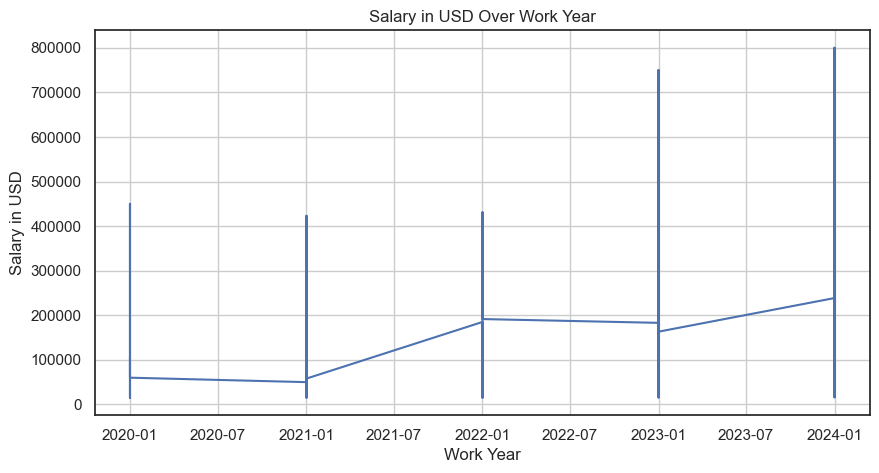

In [62]:
plt.figure(figsize=(10, 5))
plt.plot(df_clean.index, df_clean['salary_in_usd'])
plt.title("Salary in USD Over Work Year")
plt.xlabel("Work Year")
plt.ylabel("Salary in USD")
plt.grid(True)
plt.show()


Revisiting salary trend over work years, we see a clear upward trend, however there are significant spikes in certain years, suggesting outliers once again.

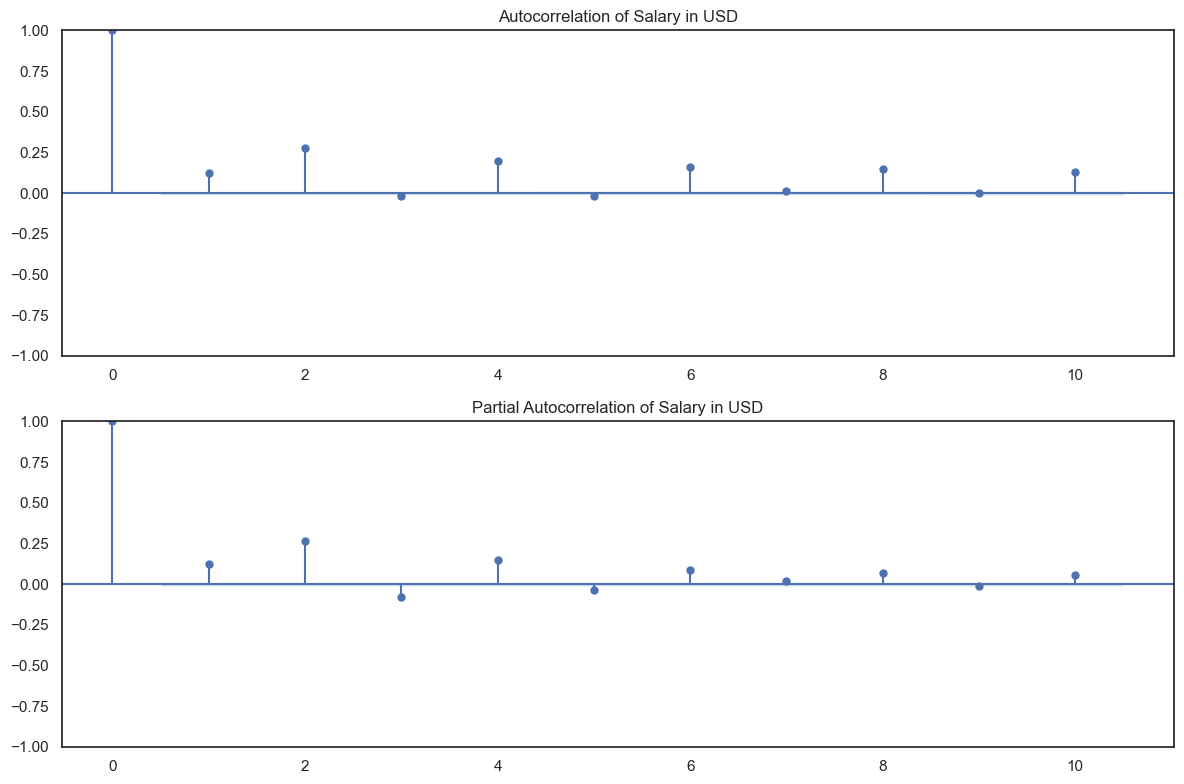

In [63]:
# Plot ACF and PACF for salary_in_usd
fig, ax = plt.subplots(2, 1, figsize=(12, 8))

# Autocorrelation plot
plot_acf(df_clean['salary_in_usd'], ax=ax[0], lags=10)
ax[0].set_title("Autocorrelation of Salary in USD")

# Partial Autocorrelation plot
plot_pacf(df_clean['salary_in_usd'], ax=ax[1], lags=10, method='ywm')
ax[1].set_title("Partial Autocorrelation of Salary in USD")

plt.tight_layout()
plt.show()


The ACF and PACF plots both drop off sharply after lag 0, suggesting little autocorrelation and confirming the DW statistics. This suggests salaries are relatively independent across time lags. However convential wisdom suggests that salaries are benchmarked to previous salaries for the same employee, so if we have additional data granuality such that we have a time progression for the same specific people, we might reach a different conclusion.

In [64]:
result = adfuller(df_clean['salary_in_usd'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Critical Values:")
for key, value in result[4].items():
    print(f"   {key}: {value}")

# Interpret the result
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is NOT stationary.")


ADF Statistic: -17.434613299253545
p-value: 4.746155947768273e-30
Critical Values:
   1%: -3.430512364486879
   5%: -2.861611761386963
   10%: -2.566808196279366
The time series is stationary.


Again the ADF test shows the time series to be stationary since the p-value is far below 0.05.

In [65]:
# Bayesian Methods - Hiearchical Bayes
# Below we use Automatic Relevance Determination (ARD) priors on the coefficients 

In [66]:
# Exclude the constant term and factorize
params_without_const = log_ols_model_significant.params[log_ols_model_significant.params.index != "const"]
pred_idxs, predictors = pd.factorize(params_without_const.index)

coords = {
    "predictors": predictors,
    "pred_id": np.arange(len(pred_idxs)),
}
print('pred_idxs = ' + str(pred_idxs[:100]))

pred_idxs = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [67]:
# Define the Bayesian Hierarchical Model with ARD priors
with pm.Model(coords=coords) as hierarchical_model:
    # Hyperpriors for the intercept and slope priors
    intercept = pm.Normal('Intercept', mu=0, sigma=10)
    
    # Hyperpriors for ARD, HalfCauchy didn't converge well and HalfNormal did
    #lambda_alpha = pm.HalfCauchy('lambda_alpha', beta=1)
    #lambda_beta = pm.HalfCauchy('lambda_beta', beta=1, shape=X_train_scaled.shape[1])

    lambda_alpha = pm.HalfNormal('lambda_alpha', sigma=1)
    lambda_beta = pm.HalfNormal('lambda_beta', sigma=1)
    
    # Priors for coefficients with ARD
    beta = pm.Normal('beta', mu=0, sigma=lambda_beta, shape=X_train_scaled.shape[1], dims="predictors")
    
    # Expected value of the outcome
    mu = intercept + pm.math.dot(X_train_scaled, beta)
    
    # Likelihood
    sigma = pm.HalfNormal('sigma', sigma=1)
    Y_obs = pm.Normal('Y_obs', mu=mu, sigma=sigma, observed=Y_train)


Sampling: [Intercept, Y_obs, beta, lambda_alpha, lambda_beta, sigma]


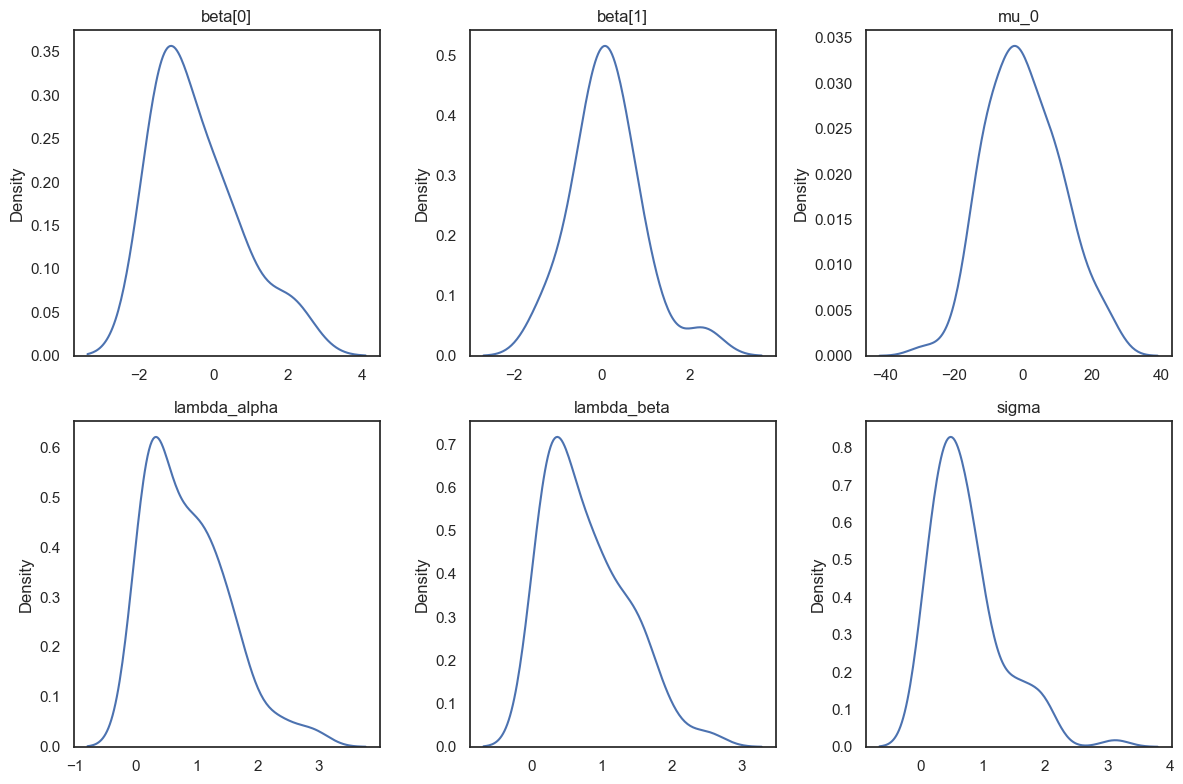

In [68]:
# Prior predictive sampling
SEED = 3434
with hierarchical_model:
    prior_checks = pm.sample_prior_predictive(samples=100, random_seed=SEED)

# Extract prior samples
prior_samples = {
    'beta[0]': prior_checks.prior['beta'][:, 0].to_numpy().flatten(),
    'beta[1]': prior_checks.prior['beta'][:, 1].to_numpy().flatten(),
    'mu_0': prior_checks.prior['Intercept'].to_numpy().flatten(),
    'lambda_alpha': prior_checks.prior['lambda_alpha'].to_numpy().flatten(),
    'lambda_beta': prior_checks.prior['lambda_beta'].to_numpy().flatten(),
    'sigma': prior_checks.prior['sigma'].to_numpy().flatten()
}

# Plot hyperprior densities
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()
for i, (var, samples) in enumerate(prior_samples.items()):
    sns.kdeplot(samples, ax=ax[i])
    ax[i].set_title(var)
plt.tight_layout()
plt.show()


The priors for the beta coefficients and mu intercept are reasonably diffuse, covering a wide range of plausible values for the regression coefficients. This ensures the model is not overly restrictive before observing data.

lambda_alpha: The prior for lambda_alpha and lambda_beta (controlling the shrinkage of the intercept) peaks around 0.5 but extends to higher values. This suggests moderate shrinkage is expected, but the prior is flexible enough to adapt based on data.

The prior for the variance parameter (sigma) is concentrated around values close to zero but has a long tail, allowing for larger values when necessary. This reflects an expectation of low variance in residuals but retains flexibility to account for noisier data.

Overall, the parameters show the model is not overly restrictive, and priors do not impose strong beliefs

In [69]:
# Inference using NUTS sampling
with hierarchical_model:
    trace = pm.sample(2000, tune=1000, chains=4, target_accept=0.9, random_seed=42)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, lambda_alpha, lambda_beta, beta, sigma]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 45 seconds.


Initially I had two divergences signal potential issues with convergence, indicating regions in the posterior with low probability density or poor parameter scaling, heavy tails also showed in priors when using Half-Cauchy for lambda_alpha and lambda_beta. Thus I changed from Half-Cauchy to Half-Normal, which improved convergence.

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'beta'}>,
        <Axes: title={'center': 'beta'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>],
       [<Axes: title={'center': 'lambda_alpha'}>,
        <Axes: title={'center': 'lambda_alpha'}>],
       [<Axes: title={'center': 'lambda_beta'}>,
        <Axes: title={'center': 'lambda_beta'}>]], dtype=object)

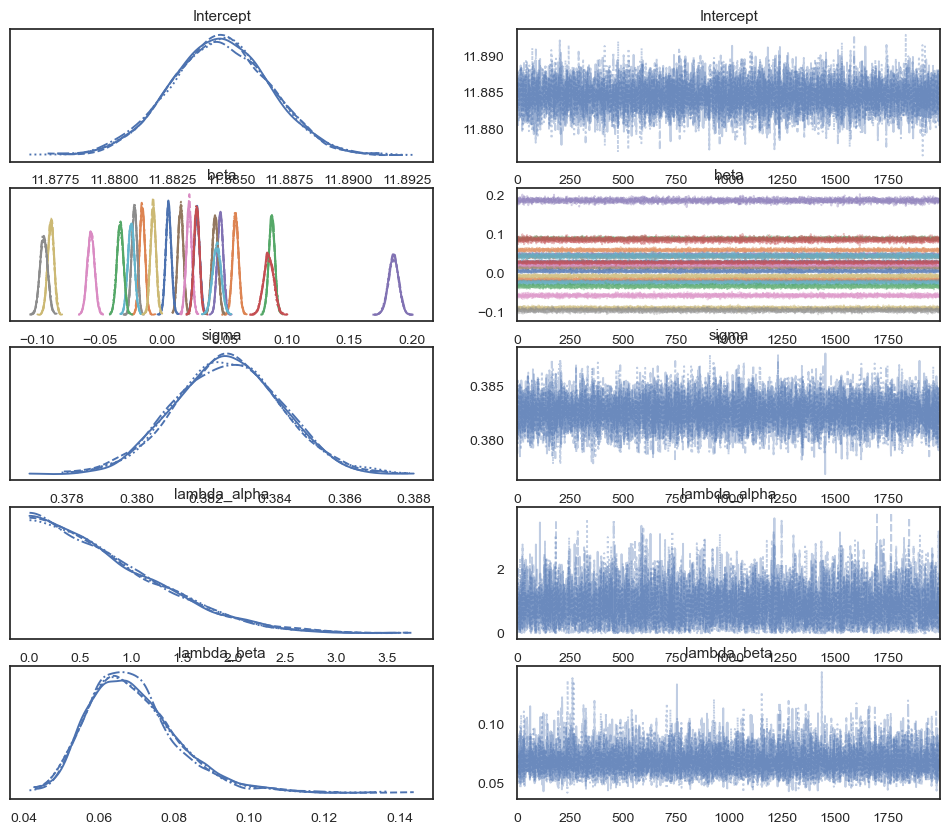

In [70]:
# Posterior diagnostics
az.plot_trace(trace, var_names=['Intercept', 'beta', 'sigma','lambda_alpha','lambda_beta'])

The trace plots show chains for Intercept, lambda_beta, and sigma exhibit good mixing with no evident trends or regional "stickiness", suggesting good convergence.  

Posteriors are relatively narrow for most parameters, confirming that the model identifies clear estimates but applies shrinkage where necessary. We see this particularly in the beta trace plots to start, Some coefficients appear near zero, suggesting shrinkage.

The trace for lambda_alpha appears especially unusual, showing a decreasing trend rather than a stationary and well-mixed behavior. It suggests strong regularization across coefficients (Increasing tuning steps doesn't change this I checked and convergence metrics such as R-hat and ESS seem normal). Lambda_beta also has a left skew, again suggesting that most coefficients experience moderate to strong shrinkage, with only a few having very low regularization.

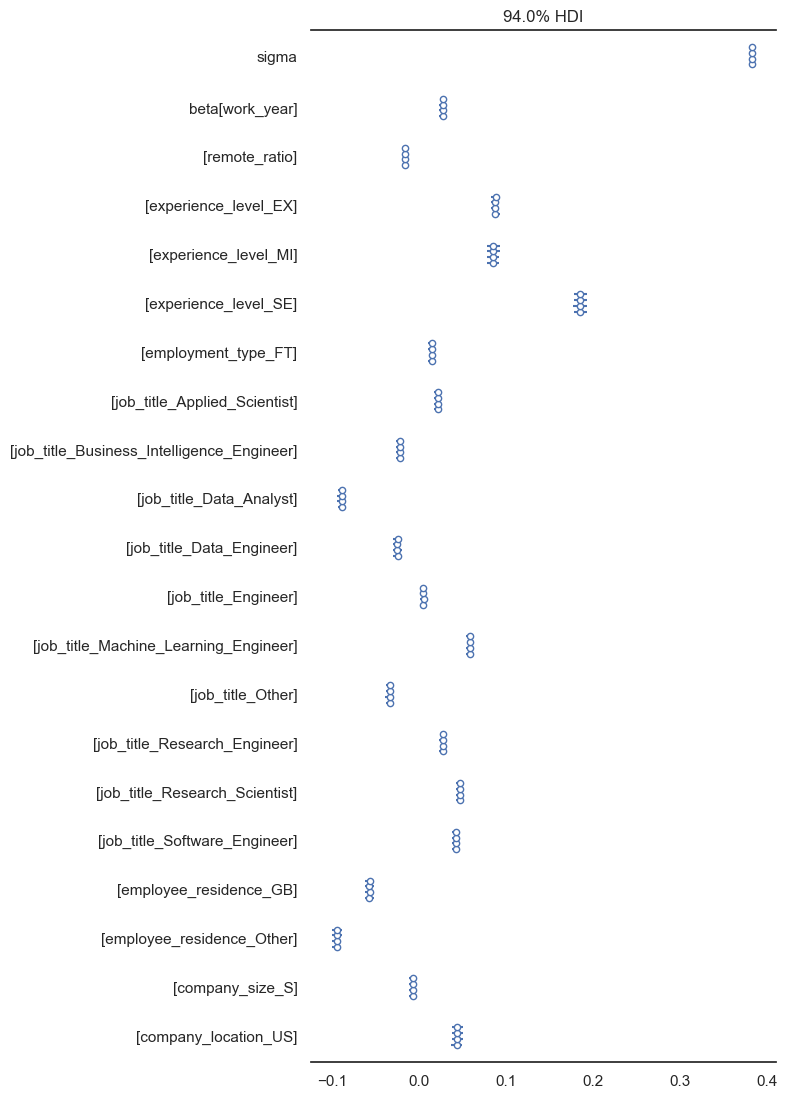

In [71]:
# Forest Plot
az.plot_forest(trace, var_names=['sigma', 'beta']);


Many of the predictors shown in the forest plot are close to 0, but none of the credible intervals include 0. Some are evidently stronger such as experience_level_SE, seniority increases salaries; Job title of Data Analyst and other employee residences (not US or Britain) decreases salaries.

The regularization effect from hierarchical priors (via lambda_alpha and lambda_beta) is evident in the shrinkage of coefficients toward zero, particularly for predictors with weaker signals.

In [72]:
# Trace summary
print(az.summary(trace, var_names=['Intercept', 'beta', 'sigma']))

                                                  mean     sd  hdi_3%  \
Intercept                                       11.885  0.002  11.881   
beta[work_year]                                  0.028  0.002   0.024   
beta[remote_ratio]                              -0.016  0.002  -0.020   
beta[experience_level_EX]                        0.088  0.002   0.083   
beta[experience_level_MI]                        0.085  0.004   0.078   
beta[experience_level_SE]                        0.185  0.004   0.178   
beta[employment_type_FT]                         0.015  0.002   0.011   
beta[job_title_Applied_Scientist]                0.022  0.002   0.017   
beta[job_title_Business_Intelligence_Engineer]  -0.022  0.002  -0.026   
beta[job_title_Data_Analyst]                    -0.089  0.003  -0.094   
beta[job_title_Data_Engineer]                   -0.025  0.003  -0.030   
beta[job_title_Engineer]                         0.005  0.002   0.001   
beta[job_title_Machine_Learning_Engineer]        0.

Showing the posterior distribution, the intercept mean value around 11.885 reflects the baseline log-transformed salary when other coefficients are neutralized.

Posterior means for most predictors are near-zero, with relatively small credible intervals. This suggests that the model has applied strong regularization, effectively shrinking less significant coefficients. The ESS values in the posterior summary are sufficiently high across parameters, ensuring reliable posterior estimates. R-hat values close to 1 for all parameters suggest that the chains have converged to the target distribution. 

Sigma: Standard deviation of residuals is small (0.383), indicating moderate uncertainty in residual predictions.


In [73]:
# Extract posterior samples for beta and intercept
beta_post = trace.posterior['beta'].values.mean(axis=(0, 1))  
intercept_post = trace.posterior['Intercept'].values.mean()   


In [74]:
# Test set predictions
mu_test = intercept_post + np.dot(X_test_scaled, beta_post)
from sklearn.metrics import r2_score

test_r2 = r2_score(Y_test, mu_test)
print(f"Test Set R²: {test_r2}")

Test Set R²: 0.3463143377459834


The R^2 is still around 0.346, which is consistent with the prior log transformed OLS and regularized models. No performance improvement method is found by using a Bayesian model. 

We have credible intervals for each estimate, which help quantify uncertainty in each coefficient estimate, an advantage over frequentist OLS. However the sd values are all low and the intervals do not provide too much additional info in our case.

Sampling: [Y_obs]


Output()

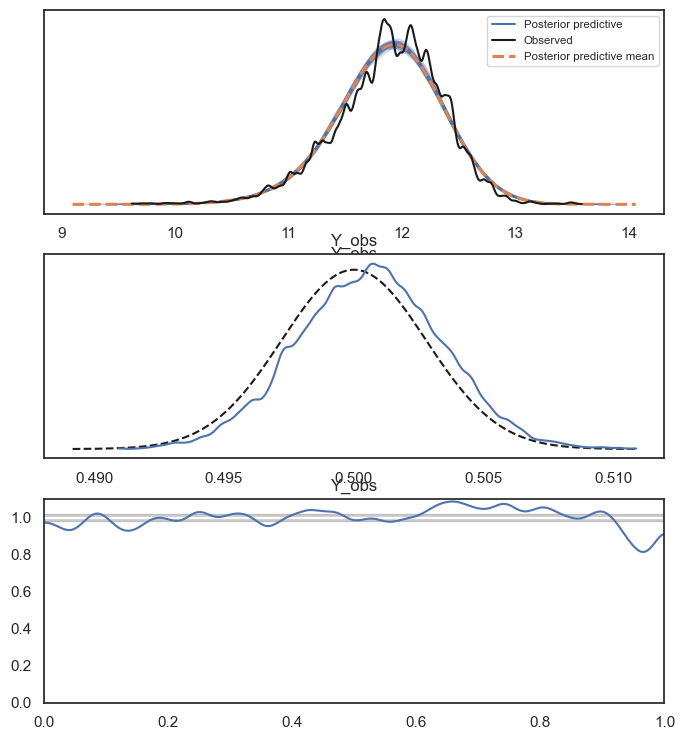

In [75]:
#p-value and u-value plots

# Y_train = Y_train.values.flatten()   
Y_train = np.ravel(Y_train)

SEED = 6565
with hierarchical_model:
    pm.sample_posterior_predictive(trace, extend_inferencedata=True, random_seed=SEED) 

_,ax = plt.subplots(3,1, figsize=(8,9))    
az.plot_ppc(trace, num_pp_samples=100, ax=ax[0]);    
az.plot_bpv(trace, kind='p_value', ax=ax[1]);
az.plot_bpv(trace, kind='u_value', ax=ax[2]);


The posterior predictive mean closely follows the observed data distribution, suggesting that the model has successfully captured the central tendencies of the observed data, with largest differences near the peak.

The p-values generally align with the expected distribution. Slight deviations in the tails or peaks highlight areas where the model diverges slightly from the observed data.

The u-value plot appears relatively flat around 1.0, suggesting that residuals are uniformly distributed as expected. No systematic underpredicts or overpredicts in regions of the observed data is clear, though deviations increase slightly towards 1.0.

In [76]:
with hierarchical_model:
    hierarchical_MAP = pm.find_MAP() 

Output()

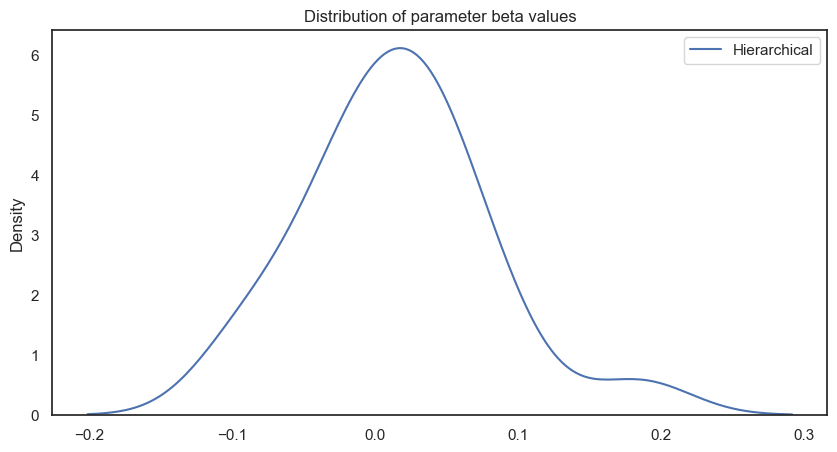

In [77]:
# Plot the distribution of beta parameter values
plt.figure(figsize=(10, 5))
sns.kdeplot(hierarchical_MAP['beta'], label='Hierarchical')
plt.title('Distribution of parameter beta values')
plt.legend()
plt.show()


The distribution shown is centered around approximately 0, indicating that the mean effect of the predictors is neutral, showing that no single predictor dominates the outcome and regularization is apparent. It is smooth and unimodal, and there is a slight positive skew in the distribution, with a longer tail on the positive side. This indicates that some predictors have a slightly stronger positive association with the response as we already saw prior.

Overall, the hiearchical bayesian model seems well behaved but again lack predictability with an R^2 of 0.346.

In conclusion, after we performed thorough EDA, we grouped small categorical levels together and formed 29 potential predictors from the data. A simple OLS was performed with very poor R^2 results at 0.207. The residuals also showed non-normality, heavy skewness, heavy tails and outliers.

A log-transformation on the Y variable salary_in_USD was performed and the OLS redone. This time R^2 improved to 0.345, which is better but still low on an absolute scale. The residuals improved and the non-constant variance was almost gone. The residuals were normality distributed except for in the tails where there are clear outliers and a slight right skew overall (Occassional very high salaries). We removed 9 insignificant predictors at the 95% level and are left with 20 predictors.

Then we applied best parameter search, both forward and recursive and found all 20 predictors to still be significant. We applied regularization methods (Ridge, Lasso, Elastic Net) which lowered the MSE somewhat from c. 0.30 to 0.14, though the R^2 levels basically did not improve. Lasso removed 3 more predictors whose coefficients were driven to 0 (Full time employment type, generic "Engineer" job title, and "Small" company size), but still did not impact the R^2 significantly and just made the model slightly learner.

We tried a polynomial model of degree 2 with all square and cross terms. The test R&2 barely improved to 0.3535, thus no higher order polynomial models were tested as linearity was shown to basically hold earlier in the log OLS model residual analysis.

Next we tried removing multicollinear predictors, the only ones with VIF>3 was experience levels "middle" and "senior", removing them again did not improve model R^2.

Durban-Watson, ADF stats, ACF and PACF plots shown no autocorrelation over the years among the salaries, though if we had individual-specific data is it possible to reach a different conclusion.

That was all for the frequentist methods. Logistic classifier was skipped as recommended in the proposal since the boundary will be arbitrary.



Finally, hiearchical Bayes, specifically Automatic Relevance Determination (ARD) priors on the coefficients was applied. Hyperiors were tested and set. Posterior means for most predictors are near-zero but credible intervals did not include zero (so all significant), with relatively small credible intervals. The trace plots show chains for Intercept, beta, and sigma exhibit good mixing with no evident trends, suggesting good convergence. Posteriors are relatively narrow for most parameters, confirming that the model identifies clear estimates but applies shrinkage where necessary. Sigma’s posterior distribution remains well-behaved. The R^2 was still around 0.346 and could not improve further.


Overall, the methods yielded 17-20 important predictors for worldwide salaries, had relatively narrow ranges for the coefficient intervals and the train and test R^2 and MSEs were relatively robust. Residuals behaved nicely and in an approximately normal fashion after a log transform but extreme outliers and heavy tails were clear, reflecting occassionally very high salaries. No significant multicollinearity or autocorrelation. Regularization, best parameter search, and polynomial regressions did not improve the R^2. Hiearchical Bayes also did not further improve R&2.


The R^2 ceiling may be due to the lack of high correlations between any of the predictors and the response variable, as we saw in the correlation matrix, with no single correlation above 0.25. We may also be missing important predictors as well: Factors such as education, company revenue, specific skills, or economic variables may explain more variation, but they are not part of the dataset. Specific individuals are not followed over time, i.e. we do not have specific time-series data either.


However, this does not mean we did not get insights and inferences in the process. Almost all the significant predictors and their signs/magnitudes made sense. To find a job with a very high salary we should:

- Not work remotely (At least officially in terms of contract)
- Work in the United States and generally not elsewhere (Though Qatar, South Korea, Malaysia, Venezuela and Israel are the exceptions if you can be based in those countries)
- Do not join small companies in terms of scale
- Aim to be an executive, or at least senior or mid level. Once you graduate entry level and get to mid and senior level it does not matter your specific seniority and other factors matter more, until you get to executive.
- Avoid the titles "Data Analyst", "Data Engineer" or "Business Intelligence Engineer"
- Make sure you get an annual raise of at least 4.5% to keep up with peers and inflation.

The conclusions fit common sense straighforward, with very little surprises and only specific, detailed findings. We are well on our way to reach the median $150,000 USD salary per year and beyond!
